In [2]:

import pandas as pd 
import numpy as np

#stats
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import textblob
#import xgboost

from textblob import TextBlob
#pip install textblob

In [3]:
import matplotlib.pyplot as plt

# Reading the Datasets

In [8]:
df=pd.read_csv(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Johnson&Johnson/Sentiment Analysis/mice_with_reviews.csv')
df.head(6)

C:\Users\Ankita\AppData\Local\Temp\ipykernel_12880\1228611074.py:1: DtypeWarning: Columns (90,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Johnson&Johnson/Sentiment Analysis/mice_with_reviews.csv')


date        asin  year  weeknum  fiscal_year  fiscal_month  \
0  2020-12-20  B000W6PY1W  2020       51         2020            12   
1  2020-12-20  B071936B11  2020       51         2020            12   
2  2020-12-20  B075KJBF9H  2020       51         2020            12   
3  2020-12-20  B07BVW522M  2020       51         2020            12   
4  2020-12-20  B07JMXSSYN  2020       51         2020            12   
5  2020-12-20  B07ZPDV5NJ  2020       51         2020            12   

   first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
0                         240.7                              210.85   
1                         197.6                              173.04   
2                         326.9                              286.26   
3                         227.5                              199.25   
4                          14.7                               12.91   
5                          89.1                               78.02   

   first_party_ordered_units_vc  average_sales_price_vc  ...  unique_pr  \
0                            59                     3.6  ...        NaN   
1                            14                    12.4  ...        NaN   
2                            18                    15.9  ...        NaN   
3                            25                     8.0  ...        NaN   
4                             1                    12.9  ...        NaN   
5                            22                     3.5  ...        1.0   

   manufacturer_comment_pr  has_image_pr  item_to_consider  \
0                      NaN           NaN                 1   
1                      NaN           NaN                 1   
2                      NaN           NaN                 1   
3                      NaN           NaN                 1   
4                      NaN           NaN                 1   
5                      0.0           0.0                 1   

   useful_ratings_negative  useful_ratings_positive  feature_wise_rating  \
0                        0                        4                    1   
1                        0                        3                    1   
2                        2                        0                    1   
3                        0                        4                    1   
4                        0                        4                    1   
5                        1                        3                    1   

   qna_answered                                              title  \
0             7                                                NaN   
1             9                                                NaN   
2             0                                                NaN   
3             6                                                NaN   
4             0                                                NaN   
5             4  Neutrogena Anti-Pickel Gesichtspflege, SOS Sof...   

                                             text_pr  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                                                NaN  
5  Bei mir hilft es leider nicht. Beim Auftragen ...  

[6 rows x 127 columns]

In [9]:
df['title'].notnull().sum()

2460

# Dropping Null Values

In [10]:
df.dropna(subset=['text_pr','title'],inplace=True)

In [11]:
df['title'].notnull().sum()

2437

# Translation from German to English

In [14]:
!pip install deep-translator

     ---------------------------------------- 62.8/62.8 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 61.5/61.5 kB ? eta 0:00:00
     -------------------------------------- 140.4/140.4 kB 4.2 MB/s eta 0:00:00


In [15]:
from deep_translator import GoogleTranslator
to_translate = ' + 3-4 tropfen reichen vollkommen aus (wie es auch in der Anwendung steht) + spendet Feuchtigkeit ohne dass das Gesicht fettet + praktische Dosierung dank der Pipette + parfümfrei + glättet die haut dank hyaluron + preis-leistungsverhältnis TOP! + zieht gut ein - leider sehe ich nur kein aufpolsternde Wirkung (laut Beschreibung soll eine aufpolsternde Wirkung haben)'
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
print(translated)

+ 3-4 drops are enough (as it says in the application) + moisturizes without making the face greasy + practical dosage thanks to the pipette + perfume-free + smoothes the skin thanks to hyaluron + TOP price-performance ratio! + absorbs well - unfortunately I don't see any padding effect (according to the description it should have a padding effect)


In [ ]:
df['translated_text_pr'] = df['text_pr'].apply(lambda x: GoogleTranslator(source='auto', target='en').translate(x))

In [ ]:
df['translated_title'] = df['title'].apply(lambda x: GoogleTranslator(source='auto', target='en').translate(x))

In [37]:
df['translated_text_pr']

5        Unfortunately it doesn't help me. A burning se...
20       Effective and does not dry out the skin. I've ...
26                                                     And
41       Burns on the skin, then the skin is worse than...
43                                                    None
                               ...                        
14724    I am very satisfied with this Neutrogena Curcu...
14729    I have very dry skin and therefore tested Neut...
14731    The set comes in an inconspicuous, simple and ...
14744               It smells very good and it feels fresh
14745    A good product...cleans well with a pleasant s...
Name: translated_text_pr, Length: 2437, dtype: object

In [40]:
df['title']

5        Neutrogena Anti-Pickel Gesichtspflege, SOS Sof...
20       Neutrogena Curcuma Clear Beruhigender Reinigun...
26       Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...
41       Neutrogena Curcuma Clear Gesichtsreinigung, Be...
43       Neutrogena Curcuma Clear Gesichtsreinigung, Be...
                               ...                        
14724    Neutrogena Curcuma Clear Beruhigende Feuchtigk...
14729    Neutrogena Hydro Boost Hyaluron Konzentrat (15...
14731    Neutrogena Hydro Boost Geschenk Set Gesichtspf...
14744    Neutrogena Anti-Mitesser Gesichtswasser, Poren...
14745    Neutrogena Anti-Mitesser Gesichtswasser, Poren...
Name: title, Length: 2437, dtype: object

In [38]:
df.rename(columns={'translated_text_pr':'text_pr_translated'}, inplace=True)

In [63]:
df1.columns

Index(['year', 'date', 'weeknum', 'fiscal_year', 'fiscal_month', 'retailer',
       'country', 'manufacturer', 'category', 'brand',
       ...
       'duplicate_group_pr', 'review_url_pr', 'manufacturer_comment_pr',
       'manufacturer_comment_text_pr', 'manufacturer_comment_date_pr',
       'has_image_pr', 'ukey_pr', 'author_pr', 'text_pr_translated',
       'summary_pr_translated'],
      dtype='object', length=124)

In [39]:
df.to_excel('C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Translated Mice Data.xlsx')

# Language Preprocessing

In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [15]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [46]:
df.columns

Index(['date', 'asin', 'year', 'weeknum', 'fiscal_year', 'fiscal_month',
       'first_party_ordered_sales_vc', 'first_party_ordered_sales_local_vc',
       'first_party_ordered_units_vc', 'average_sales_price_vc',
       ...
       'has_image_pr', 'item_to_consider', 'useful_ratings_negative',
       'useful_ratings_positive', 'feature_wise_rating', 'qna_answered',
       'title', 'text_pr', 'text_pr_translated', 'translated_title'],
      dtype='object', length=129)

In [123]:
df1=df.copy().head(100)

In [48]:
df['text_pr_translated'] = df['text_pr_translated'].astype(str)

In [16]:
stop = set(nltk.corpus.stopwords.words('english'))

#Abbrevations and Words correction
def clean_text(text):
    #'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
   # text = text.apply(lambda x: re.sub("  "," ", x))
    return text

clean = lambda x: clean_text(x)


In [52]:
df['text_pr_translated'] = df['text_pr_translated'].apply(clean)

In [53]:
# Text Preprocessing:  Lemmitization and stop word removal

#df1['summary_pr_translated'] = df1['summary_pr_translated'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text_pr_translated'] = df['text_pr_translated'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#df['summary_pr_translated'] = df['summary_pr_translated'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#df['text_pr_translated'] = df['text_pr_translated'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
# Did not run this code

#import string
#def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    #text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)      #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    #text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    #text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    #text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    #text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    #return(text)

# Sentiment Score Analysis

In [54]:
df['text_sentiment_sc'] = df["text_pr_translated"].apply(lambda x: TextBlob(x).sentiment.polarity )
#df['summary_sentiment_sc'] = df["summary_pr_translated"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [55]:
df.head()

date        asin  year  weeknum  fiscal_year  fiscal_month  \
5   2020-12-20  B07ZPDV5NJ  2020       51         2020            12   
20  2020-12-20  B087ZG9VTV  2020       51         2020            12   
26  2020-12-21  B07BVW522M  2020       51         2020            12   
41  2020-12-21  B087ZFLY3K  2020       51         2020            12   
43  2020-12-21  B087ZFLY3K  2020       51         2020            12   

    first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
5                           89.1                               78.02   
20                         304.0                              266.24   
26                         151.9                              133.03   
41                         105.0                               91.92   
43                         105.0                               91.92   

    first_party_ordered_units_vc  average_sales_price_vc  ...  \
5                             22                     3.5  ...   
20                            64                     4.2  ...   
26                            17                     7.8  ...   
41                            26                     3.5  ...   
43                            26                     3.5  ...   

    item_to_consider  useful_ratings_negative  useful_ratings_positive  \
5                  1                        1                        3   
20                 1                        0                        1   
26                 1                        0                        4   
41                 1                        1                        3   
43                 1                        1                        3   

    feature_wise_rating  qna_answered  \
5                     1             4   
20                    1             4   
26                    1             6   
41                    1             4   
43                    1             4   

                                                title  \
5   Neutrogena Anti-Pickel Gesichtspflege, SOS Sof...   
20  Neutrogena Curcuma Clear Beruhigender Reinigun...   
26  Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...   
41  Neutrogena Curcuma Clear Gesichtsreinigung, Be...   
43  Neutrogena Curcuma Clear Gesichtsreinigung, Be...   

                                              text_pr  \
5   Bei mir hilft es leider nicht. Beim Auftragen ...   
20  Wirkt und trocknet die Haut nicht aus. Habe sc...   
26                                                 Ja   
41  Brennt auf der Haut, danach ist die Haut schli...   
43                                                ☹☹☹   

                                   text_pr_translated  \
5   unfortunately doesnt help burning sensation fe...   
20  effective dry skin ive tried many things im gl...   
26                                                      
41  burns skin skin worse feeling dry soothing som...   
43                                               none   

                                     translated_title  text_sentiment_sc  
5   Neutrogena anti-pimple face care, SOS immediat...           0.040000  
20  Neutrogena Curcuma Clear Soothing cleansing fo...           0.383333  
26  Neutrogena Hydro Boost Hyaluron Serum, aqua pe...           0.000000  
41  Neutrogena Curcuma Clear facial cleansing, soo...          -0.122222  
43  Neutrogena Curcuma Clear facial cleansing, soo...           0.000000  

[5 rows x 130 columns]

In [ ]:
df.to_excel('C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Translated Mice Data.xlsx')

Can redefine the threshold value for categorizing Sentiment scores as positive, negative etc after discussion

# Defining a Threshold Value for SC score to assess categories of very positive, positive, neutral, very negative and negative sentiments

In [4]:
df=pd.read_excel(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Johnson&Johnson/Data/Review Anlaysis Data/Translated Mice Data.xlsx')
df.head()

date        asin  year  weeknum  fiscal_year  fiscal_month  \
0  2020-12-20  B07ZPDV5NJ  2020       51         2020            12   
1  2020-12-20  B087ZG9VTV  2020       51         2020            12   
2  2020-12-21  B07BVW522M  2020       51         2020            12   
3  2020-12-21  B087ZFLY3K  2020       51         2020            12   
4  2020-12-21  B087ZFLY3K  2020       51         2020            12   

   first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
0                          89.1                               78.02   
1                         304.0                              266.24   
2                         151.9                              133.03   
3                         105.0                               91.92   
4                         105.0                               91.92   

   first_party_ordered_units_vc  average_sales_price_vc  ...  \
0                            22                     3.5  ...   
1                            64                     4.2  ...   
2                            17                     7.8  ...   
3                            26                     3.5  ...   
4                            26                     3.5  ...   

   item_to_consider  useful_ratings_negative  useful_ratings_positive  \
0                 1                        1                        3   
1                 1                        0                        1   
2                 1                        0                        4   
3                 1                        1                        3   
4                 1                        1                        3   

   feature_wise_rating  qna_answered  \
0                    1             4   
1                    1             4   
2                    1             6   
3                    1             4   
4                    1             4   

                                               title  \
0  Neutrogena Anti-Pickel Gesichtspflege, SOS Sof...   
1  Neutrogena Curcuma Clear Beruhigender Reinigun...   
2  Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...   
3  Neutrogena Curcuma Clear Gesichtsreinigung, Be...   
4  Neutrogena Curcuma Clear Gesichtsreinigung, Be...   

                                             text_pr  \
0  Bei mir hilft es leider nicht. Beim Auftragen ...   
1  Wirkt und trocknet die Haut nicht aus. Habe sc...   
2                                                 Ja   
3  Brennt auf der Haut, danach ist die Haut schli...   
4                                                ☹☹☹   

                                  text_pr_translated  \
0  Unfortunately it doesn't help me. A burning se...   
1  Effective and does not dry out the skin. I've ...   
2                                                And   
3  Burns on the skin, then the skin is worse than...   
4                                                NaN   

                                    translated_title  text_sentiment_sc  
0  Neutrogena anti-pimple face care, SOS immediat...           0.040000  
1  Neutrogena Curcuma Clear Soothing cleansing fo...           0.383333  
2  Neutrogena Hydro Boost Hyaluron Serum, aqua pe...           0.000000  
3  Neutrogena Curcuma Clear facial cleansing, soo...          -0.122222  
4  Neutrogena Curcuma Clear facial cleansing, soo...           0.000000  

[5 rows x 130 columns]

In [5]:
df.shape

(2437, 130)

# Language Processing on the Translated Data

In [62]:
df['text_pr_translated'] = df['text_pr_translated'].astype(str)

In [63]:
stop = set(nltk.corpus.stopwords.words('english'))

#Abbrevations and Words correction
def clean_text(text):
    #'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
   # text = text.apply(lambda x: re.sub("  "," ", x))
    return text

clean = lambda x: clean_text(x)

In [64]:
df['text_pr_translated'] = df['text_pr_translated'].apply(clean)

In [65]:
df['text_pr_translated'] = df['text_pr_translated'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

There are total of 2437 available reviews in the dataset

In [66]:
df['sentiment_text'] = np.where(df.text_sentiment_sc>0.07,'Very Positive',np.where(df.text_sentiment_sc>=0.04,'Positive',np.where(df.text_sentiment_sc<=-0.07,'Very Negative',np.where(df.text_sentiment_sc<=-0.05, 'Negative','Neutral'))))

In [67]:
pd.crosstab(df.star_rating_pr, df.sentiment_text)

sentiment_text  Negative  Neutral  Positive  Very Negative  Very Positive
star_rating_pr                                                           
1                      5       72        12             92            108
2                      3       36        11             27             60
3                      4       44         4             21            152
4                      5       36         9             10            281
5                     14      149        21             32           1229

In [8]:
df.conversion_rate_vc.describe()

count    2437.000000
mean        0.144022
std         0.080785
min        -0.571400
25%         0.094200
50%         0.134800
75%         0.181200
max         1.150000
Name: conversion_rate_vc, dtype: float64

# Splitting Data at the Sub-Category Level

In [68]:
df_acne = df[df.gsr_level_2 == 'Acne Treatments']
df_moisturiser = df[df.gsr_level_2 == 'Moisturisers']
df_cleansers = df[df.gsr_level_2 == 'Cleansers']

In [69]:
df_acne_positive = df_acne[((df_acne.sentiment_text == "Positive") | (df_acne.sentiment_text == 'Very Positive'))]
df_acne_negative = df_acne[((df_acne.sentiment_text == "Negative") | (df_acne.sentiment_text == 'Too Negative'))]

df_moisturiser_positive = df_moisturiser[((df_moisturiser.sentiment_text == "Positive") | (df_moisturiser.sentiment_text == 'Very Positive'))]
df_moisturiser_negative = df_moisturiser[((df_moisturiser.sentiment_text == "Negative") | (df_moisturiser.sentiment_text == 'Too Negative'))]

df_cleansers_positive = df_cleansers[((df_cleansers.sentiment_text == "Positive") | (df_cleansers.sentiment_text == 'Very Positive'))]
df_cleansers_negative = df_cleansers[((df_cleansers.sentiment_text == "Negative") | (df_cleansers.sentiment_text == 'Too Negative'))]

In [70]:
positive_review_acne=df_acne_positive['text_pr_translated']
negative_review_acne=df_acne_negative['text_pr_translated']

positive_review_cleansers=df_cleansers_positive['text_pr_translated']
negative_review_cleansers=df_cleansers_negative['text_pr_translated']

positive_review_moisturisers=df_moisturiser_positive['text_pr_translated']
negative_review_moisturisers=df_moisturiser_negative['text_pr_translated']

# Overall Positive and Negative Reviews

In [71]:
Positive_review = df.text_pr_translated[df.text_sentiment_sc>=0.05].astype(str)
Negative_review= df.text_pr_translated[df.text_sentiment_sc<0.05].astype(str)

In [72]:
Positive_review

1       effective dry skin ive tried many things im gl...
7       since ive using curcuma clear skin gotten lot ...
11      great serum unfortunately skin doesnt tolerate...
12      love neutrogena aqua gel scent subtle pleasant...
13      great product great problem skin tolerance gre...
                              ...                        
2431    satisfied neutrogena curcuma cream cream suita...
2432    satisfied neutrogena curcuma cream cream suita...
2434    set comes inconspicuous simple oversized brown...
2435                              smells good feels fresh
2436    good productcleans well pleasant smell deliver...
Name: text_pr_translated, Length: 1872, dtype: object

# Word Clouds for Overall Positive Reviews 

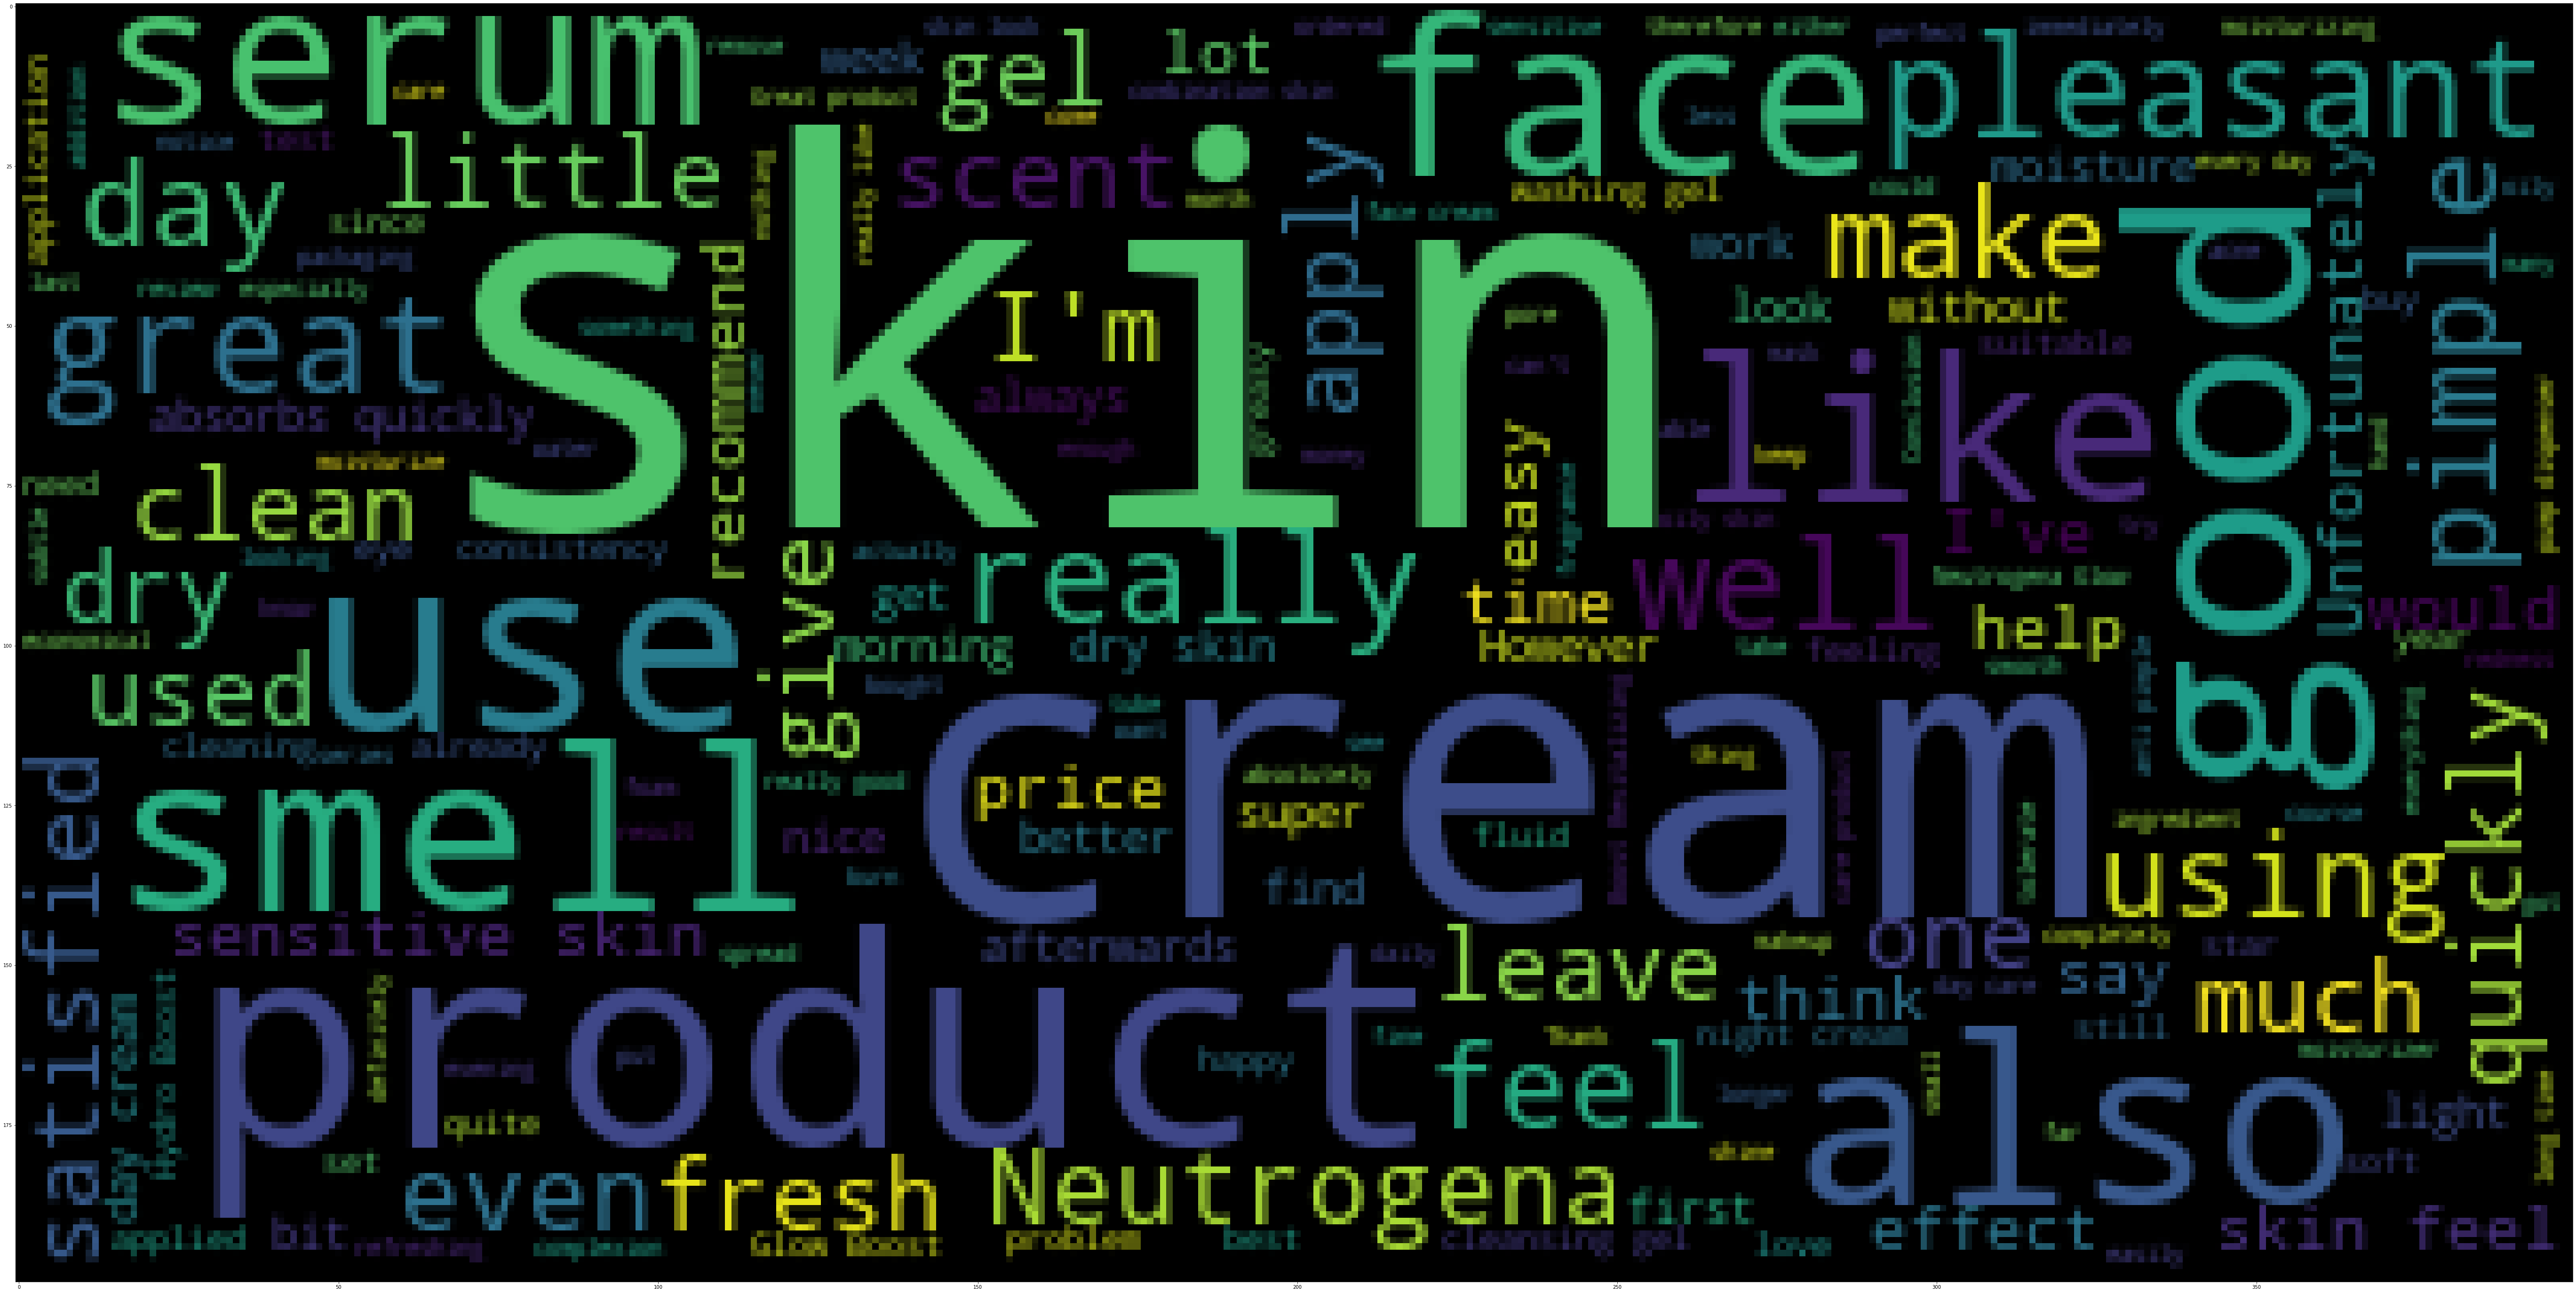

In [28]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Positive_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In Positive Reviews, the most commonly used relevant words are face pleasant, smell, absorbs quickly,fresh,satsified,easy apply,
love effect etc.

# Word Clouds for  Overall Negative Reviews 

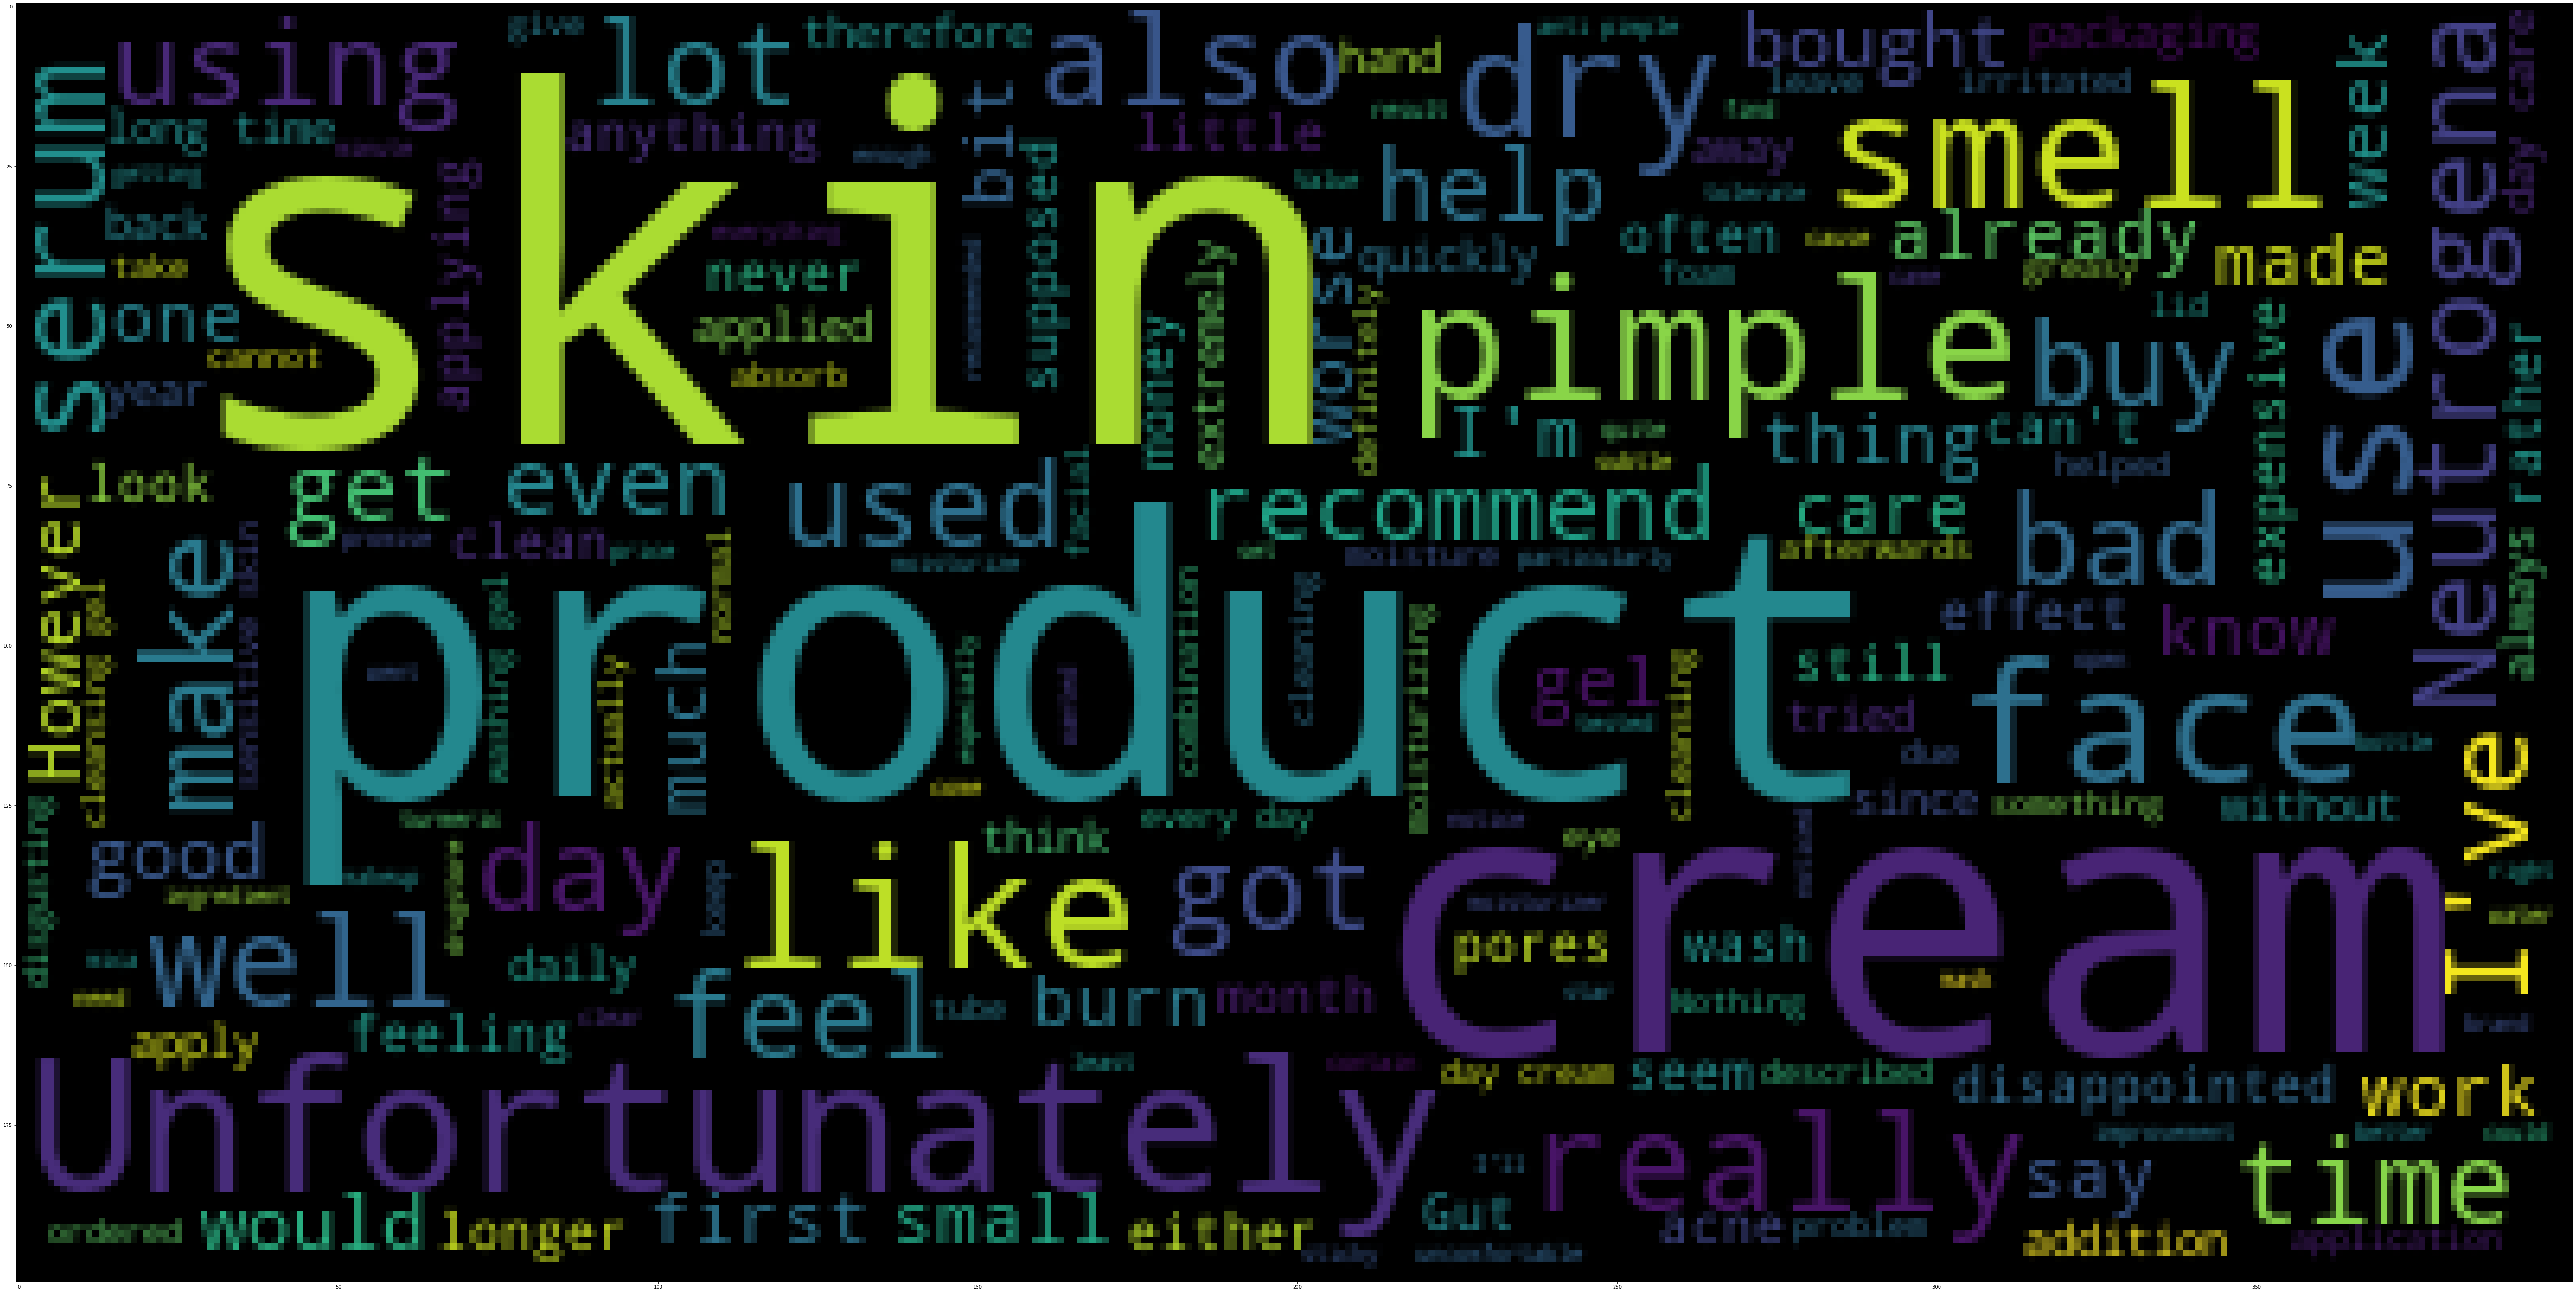

In [29]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Negative_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In Negative Reviews, Most commonly used keywords are related to Product, Skin, Smell and Packaging. Some of the most commonly
mentioned relevant words in negative reviews are burn, apply, pimple, dry skin, unfortunately, disappointed, irritated,
expensive, worse etc

In [30]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Positive_review_count = count_vect.fit_transform(Positive_review)
Positive_review_dtm=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names())

In [31]:
ount_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(Negative_review)
Negative_review_dtm=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names())

# Word Frequency for overall positive and negative reviews

<AxesSubplot:>

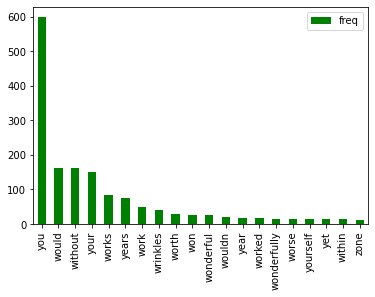

In [39]:
word_freq = pd.DataFrame(Positive_review_dtm.apply(sum).tail(20), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='Green')

#fig = plt.figure(figsize=(200,50))

<AxesSubplot:>

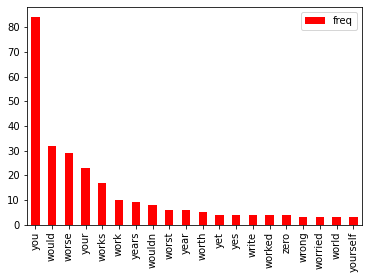

In [38]:
word_freq = pd.DataFrame(Negative_review_dtm.apply(sum).tail(20), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='red')

# Word Clouds and Top Keyowords for Acne Treatments

1. Word clouds for Positive Reviews 

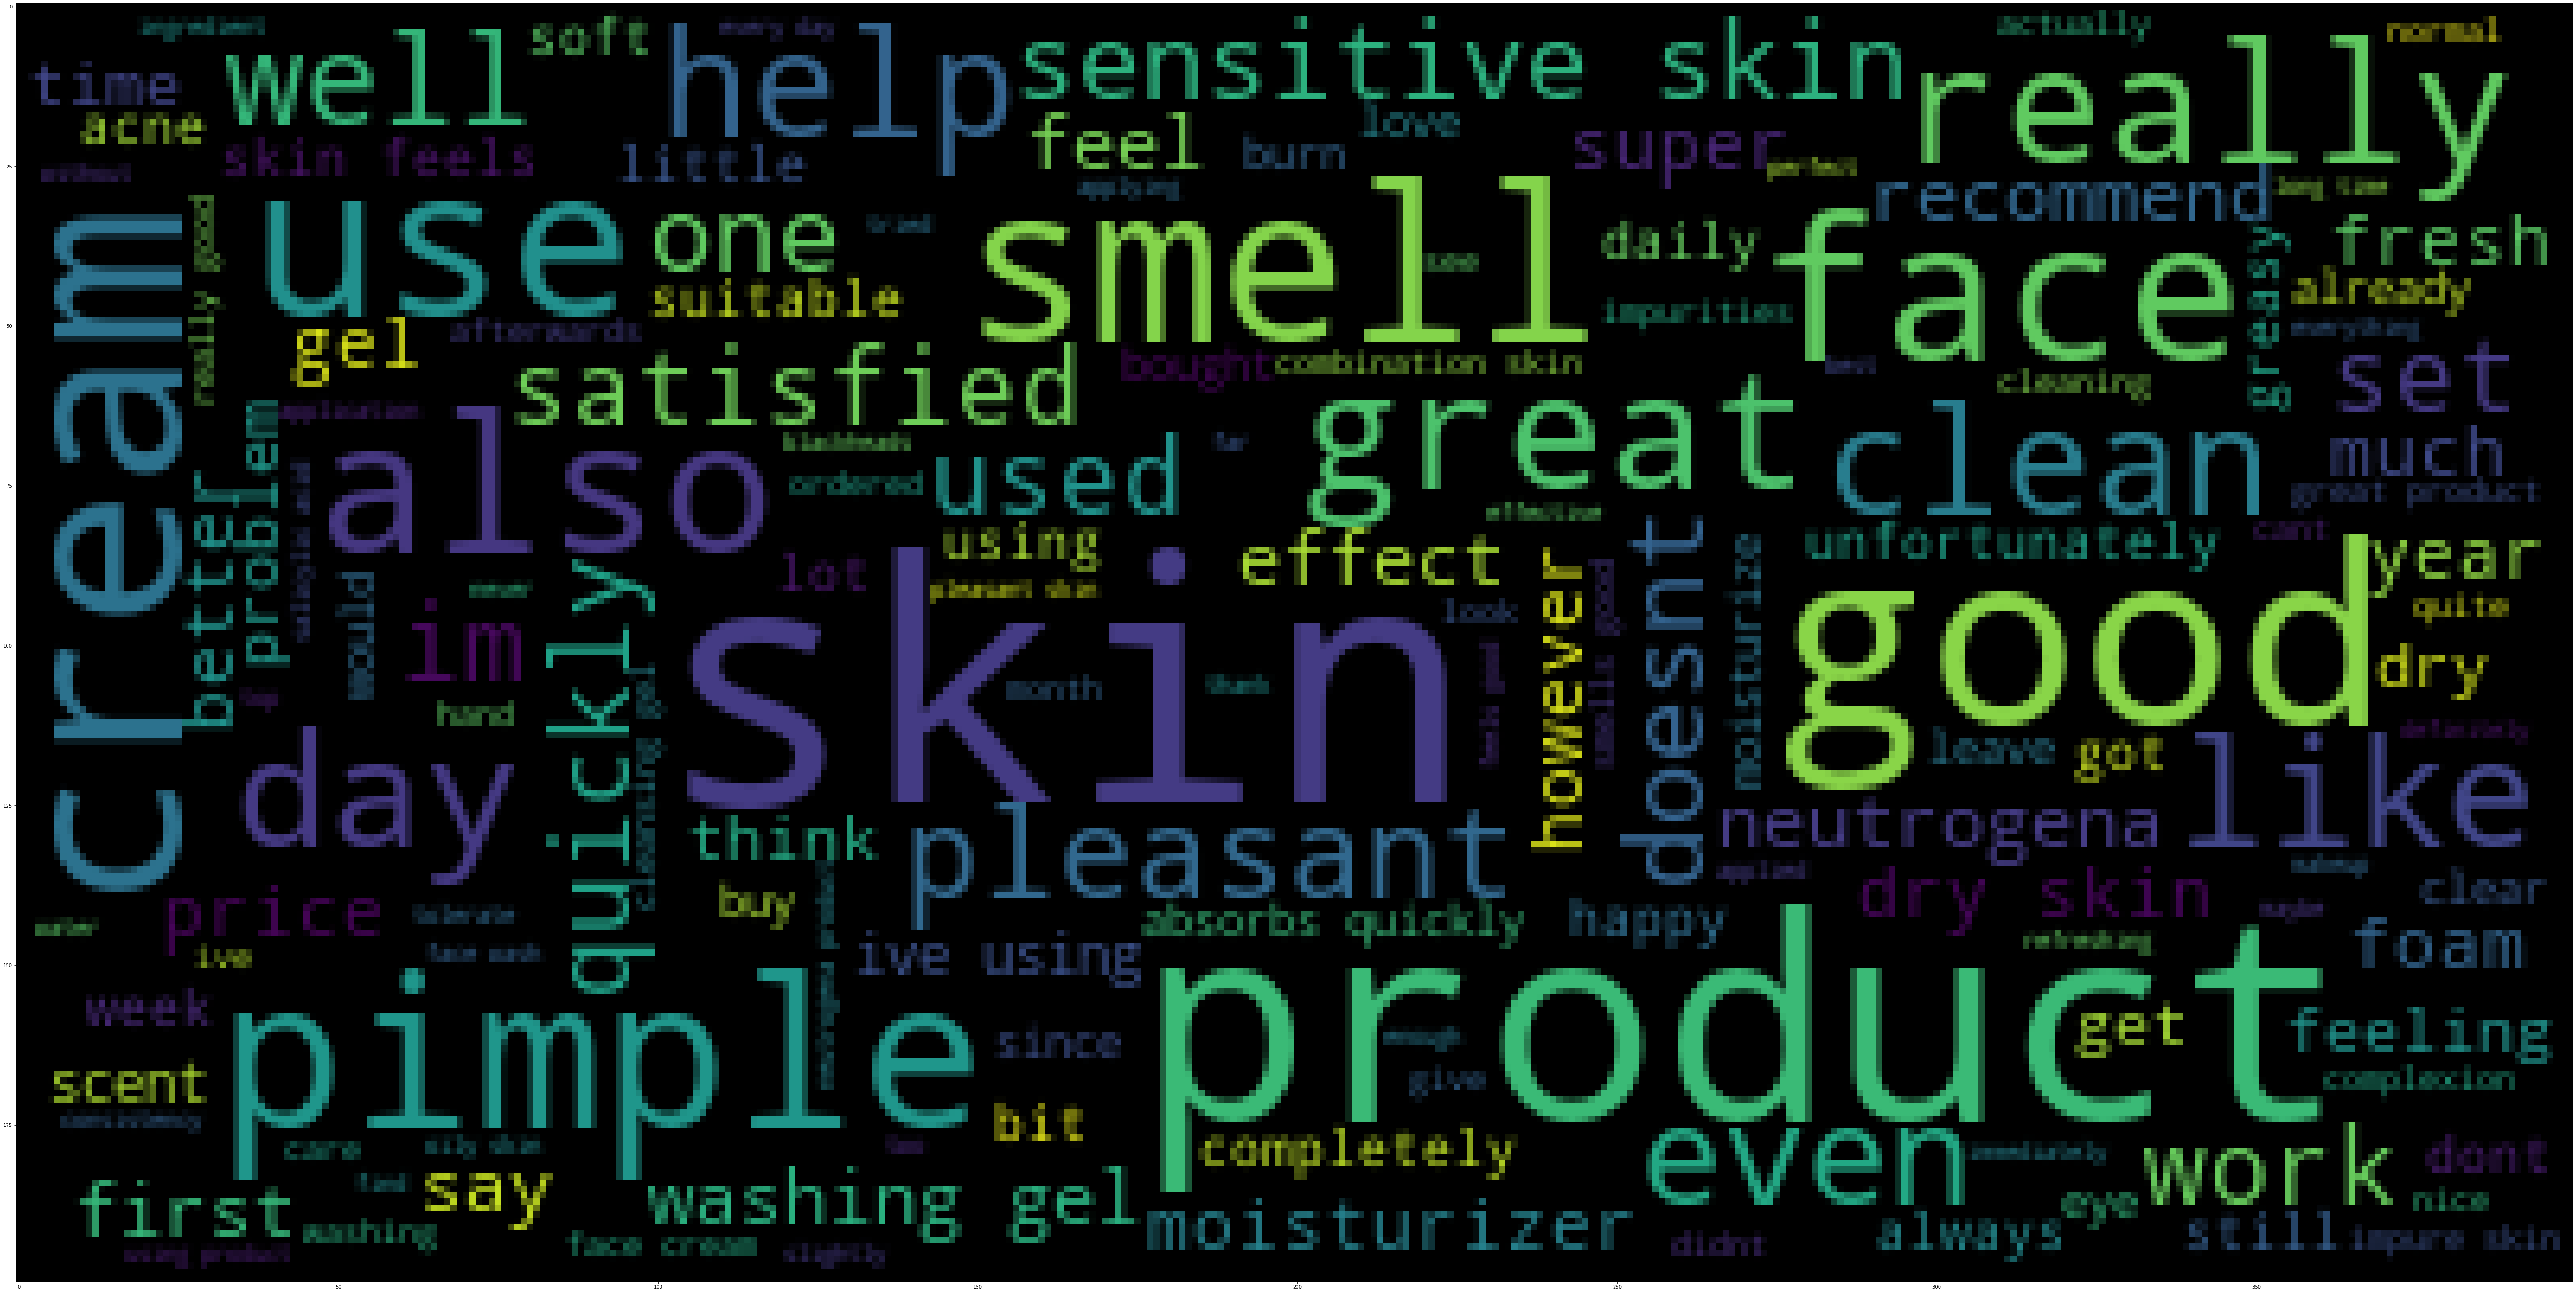

In [73]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(positive_review_acne.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

2. Word Cloud for Negative Reviews

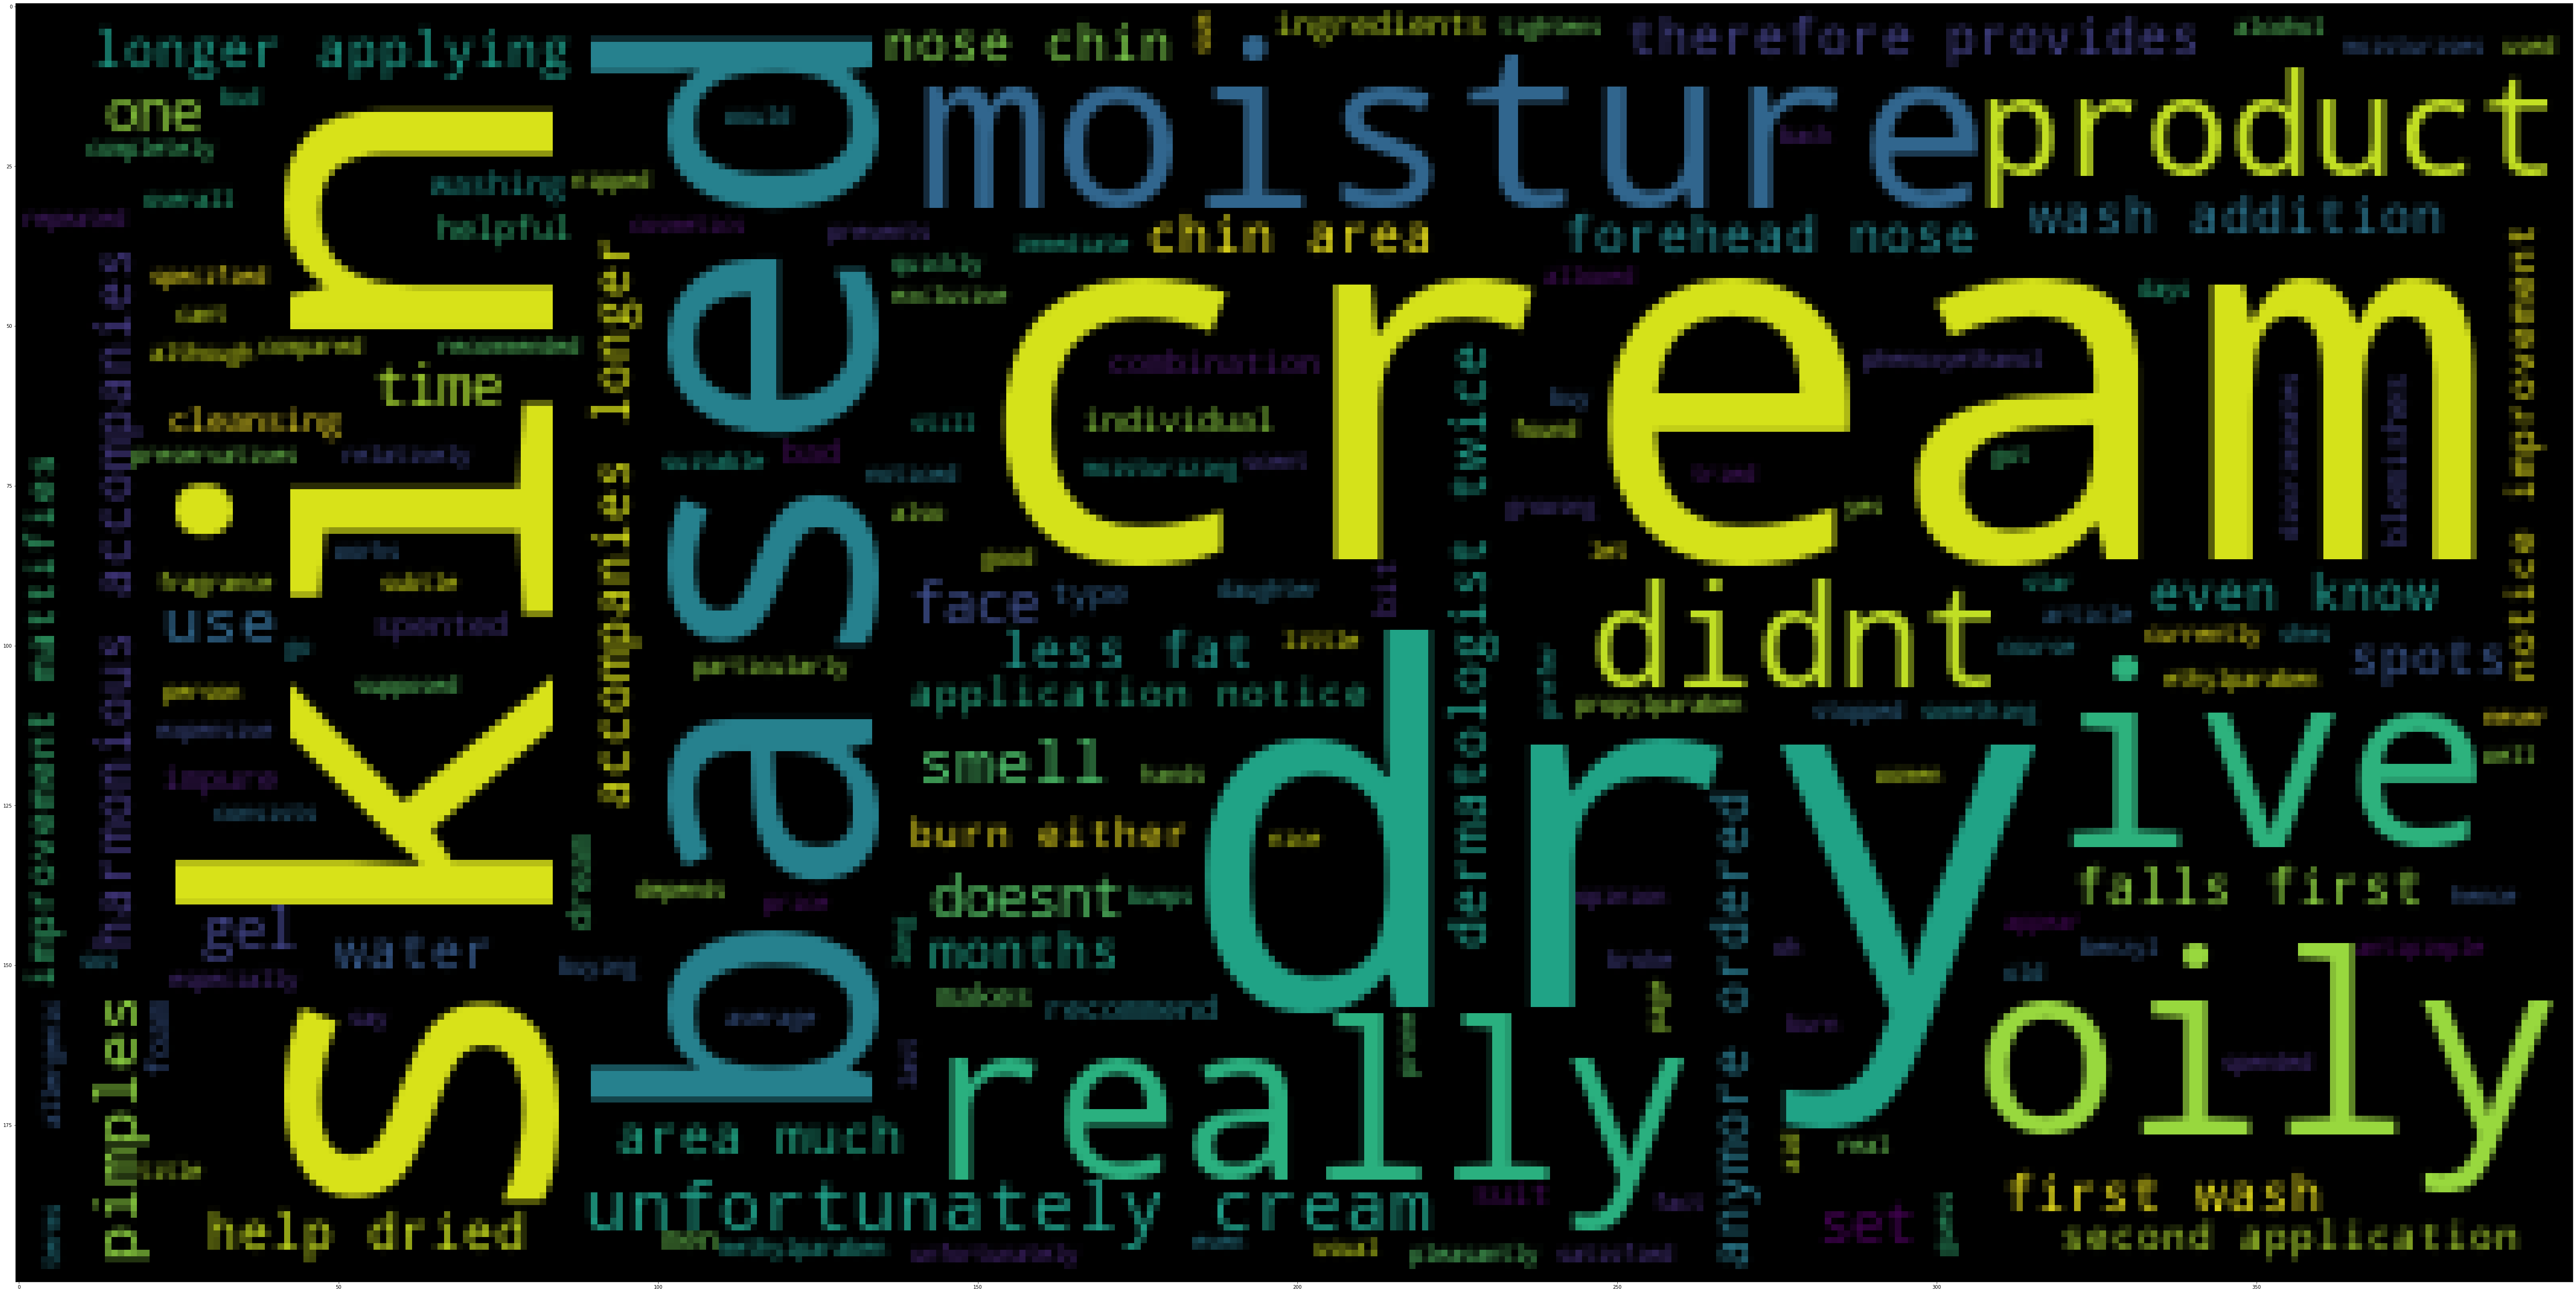

In [74]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(negative_review_acne.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [75]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Positive_review_count = count_vect.fit_transform(positive_review_acne)
Positive_review_dtm_a=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names())

In [76]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(negative_review_acne)
Negative_review_dtm_a=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names())

In [77]:
word_freq_dictionary_acne_pos = dict(Positive_review_dtm_a.apply(sum))
word_freq_dictionary_acne_neg = dict(Negative_review_dtm_a.apply(sum))

acne_pos =pd.DataFrame([word_freq_dictionary_acne_pos ]).T.reset_index()
acne_pos.rename(columns={'index':'Keywords'}, inplace=True)
acne_pos.rename(columns={0:'Keyword Frequency'}, inplace=True)

acne_neg =pd.DataFrame([word_freq_dictionary_acne_neg]).T.reset_index()
acne_neg.rename(columns={'index':'Keywords'}, inplace=True)
acne_neg.rename(columns={0:'Keyword Frequency'}, inplace=True)

In [78]:
acne_positive_word_freq=acne_pos.sort_values(by=['Keyword Frequency'],ascending=False).head(10)
acne_negative_word_freq=acne_neg.sort_values(by=['Keyword Frequency'],ascending=False).head(10)

3. Most Frequently Used Keywords

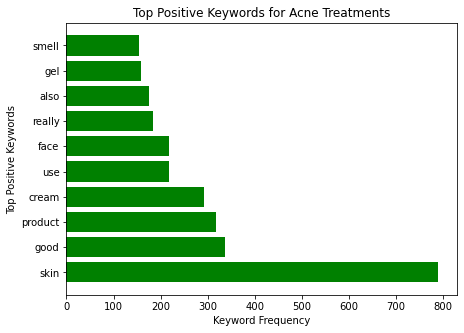

In [79]:
plt.figure(figsize = ( 7 , 5))
plt.barh(acne_positive_word_freq['Keywords'],acne_positive_word_freq['Keyword Frequency'],color='Green')
plt.title('Top Positive Keywords for Acne Treatments')
plt.ylabel('Top Positive Keywords')
plt.xlabel('Keyword Frequency')
plt.show()

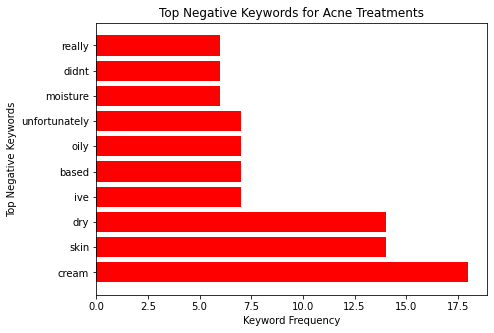

In [80]:
plt.figure(figsize = ( 7 , 5))
plt.barh(acne_negative_word_freq['Keywords'],acne_negative_word_freq['Keyword Frequency'],color='Red')
plt.title('Top Negative Keywords for Acne Treatments')
plt.ylabel('Top Negative Keywords')
plt.xlabel('Keyword Frequency')
plt.show()

# Word Clouds and Top Keyowords for Cleansers

1. Word Clouds for Positive Reviews

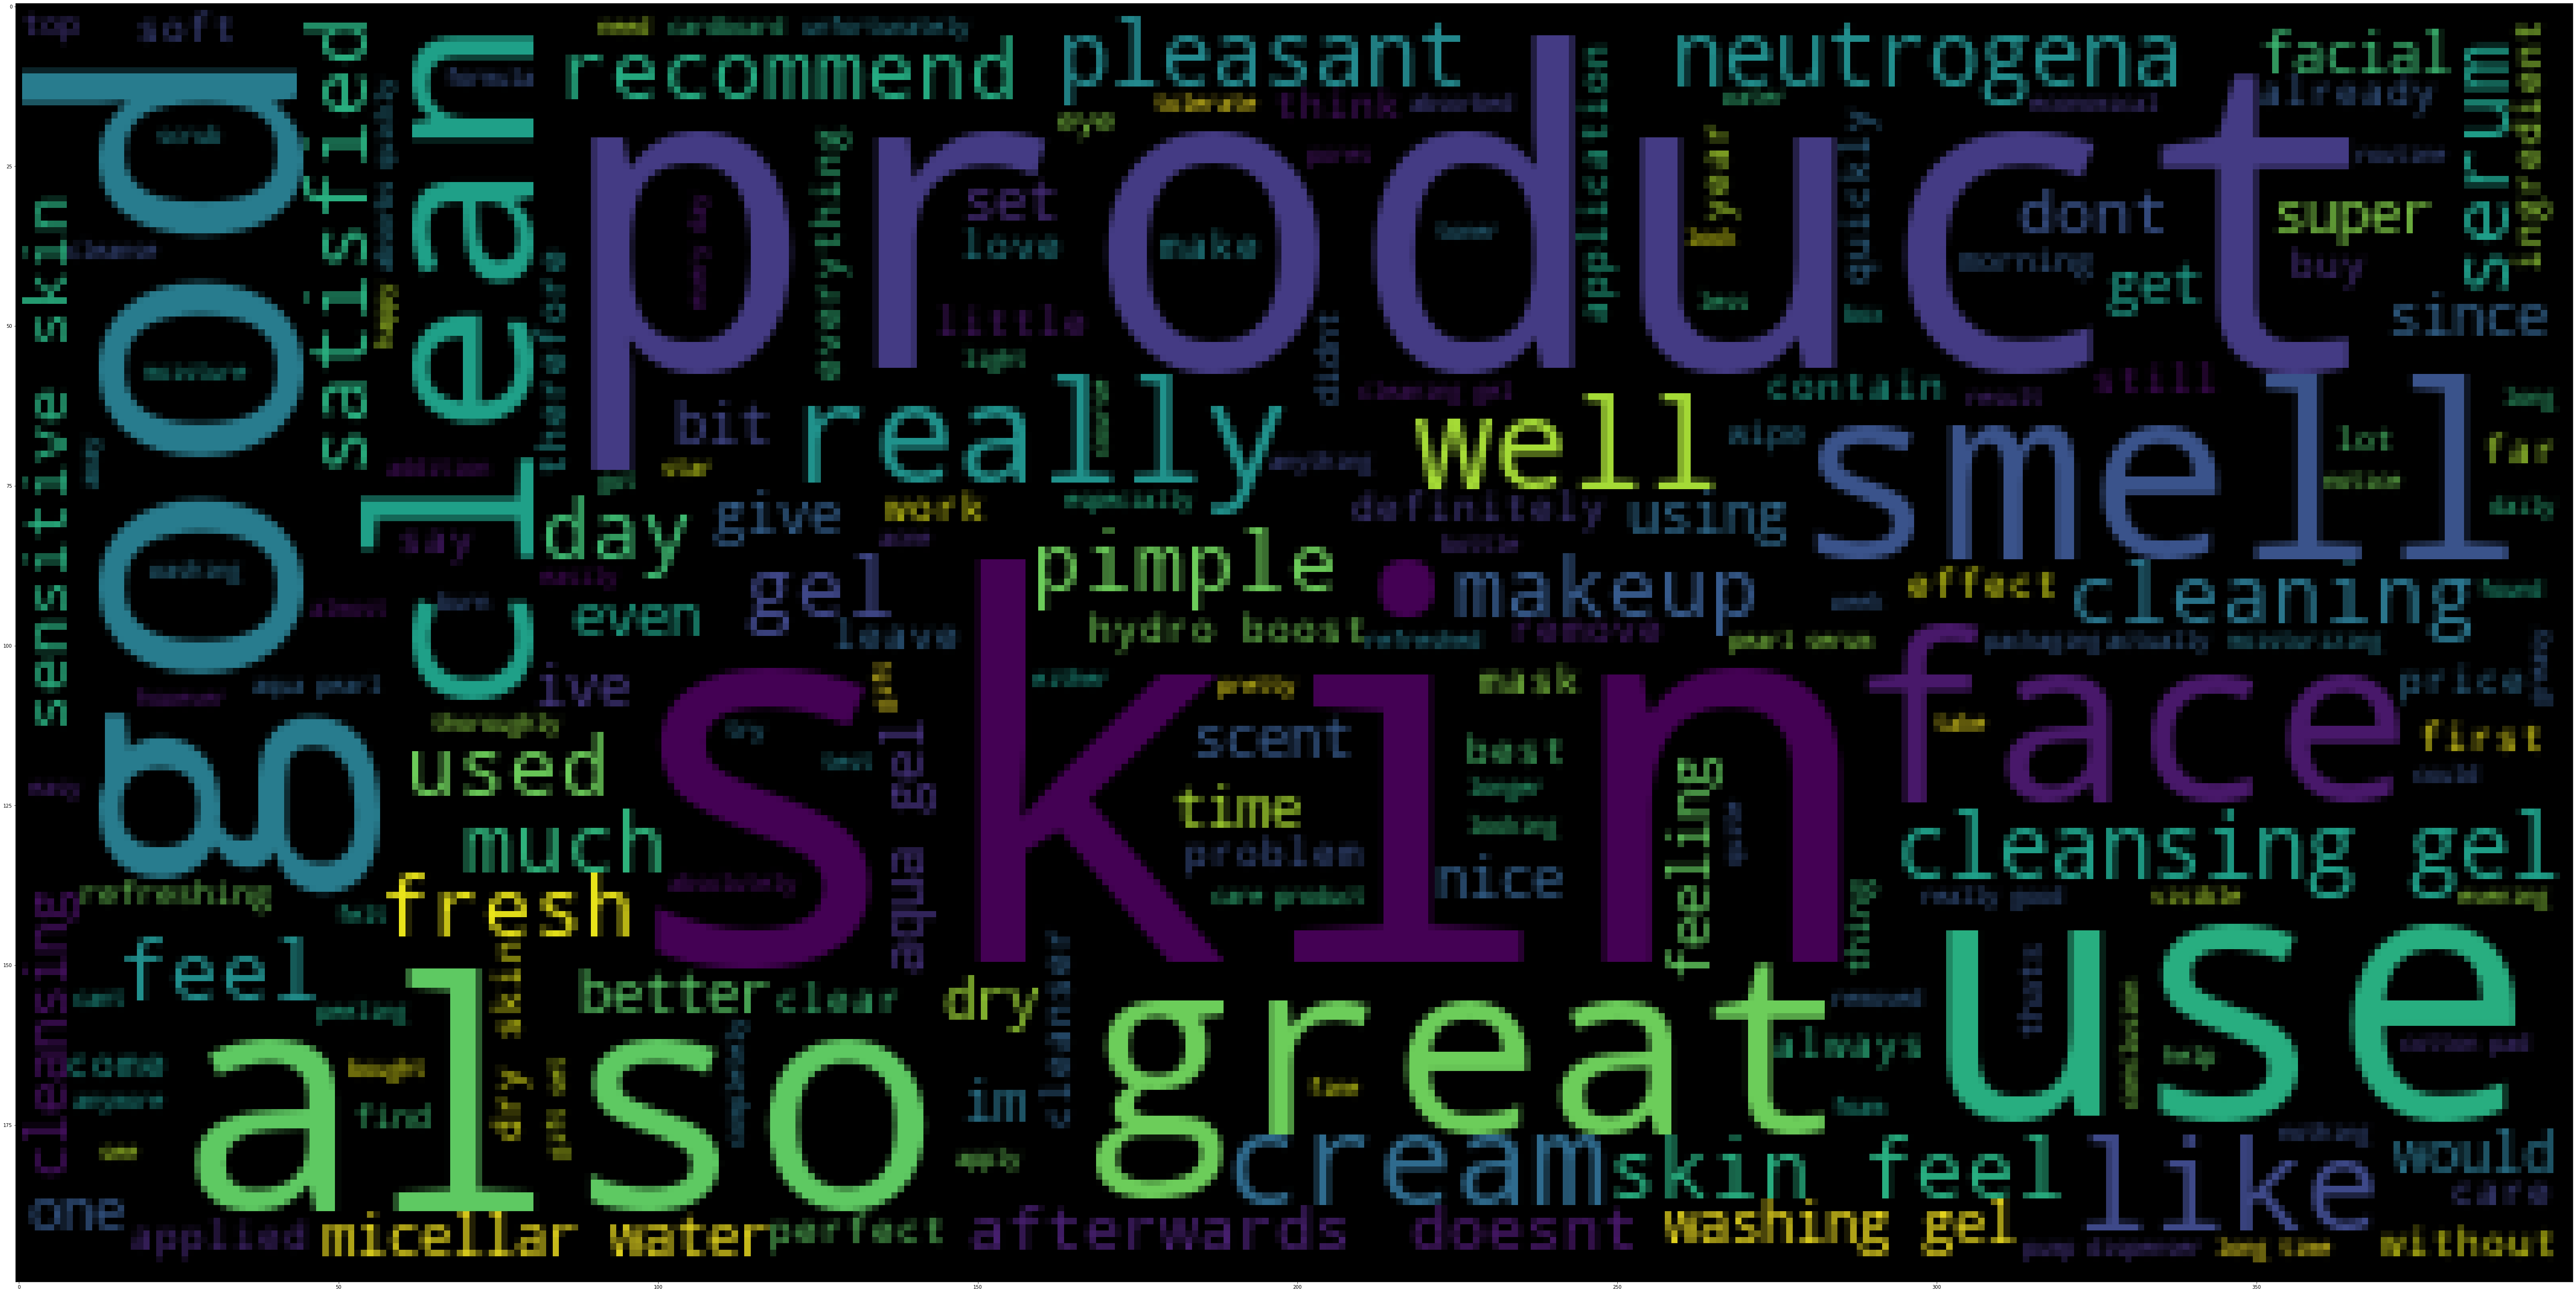

In [81]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(positive_review_cleansers.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

2. Word Clouds For Negative Reviews

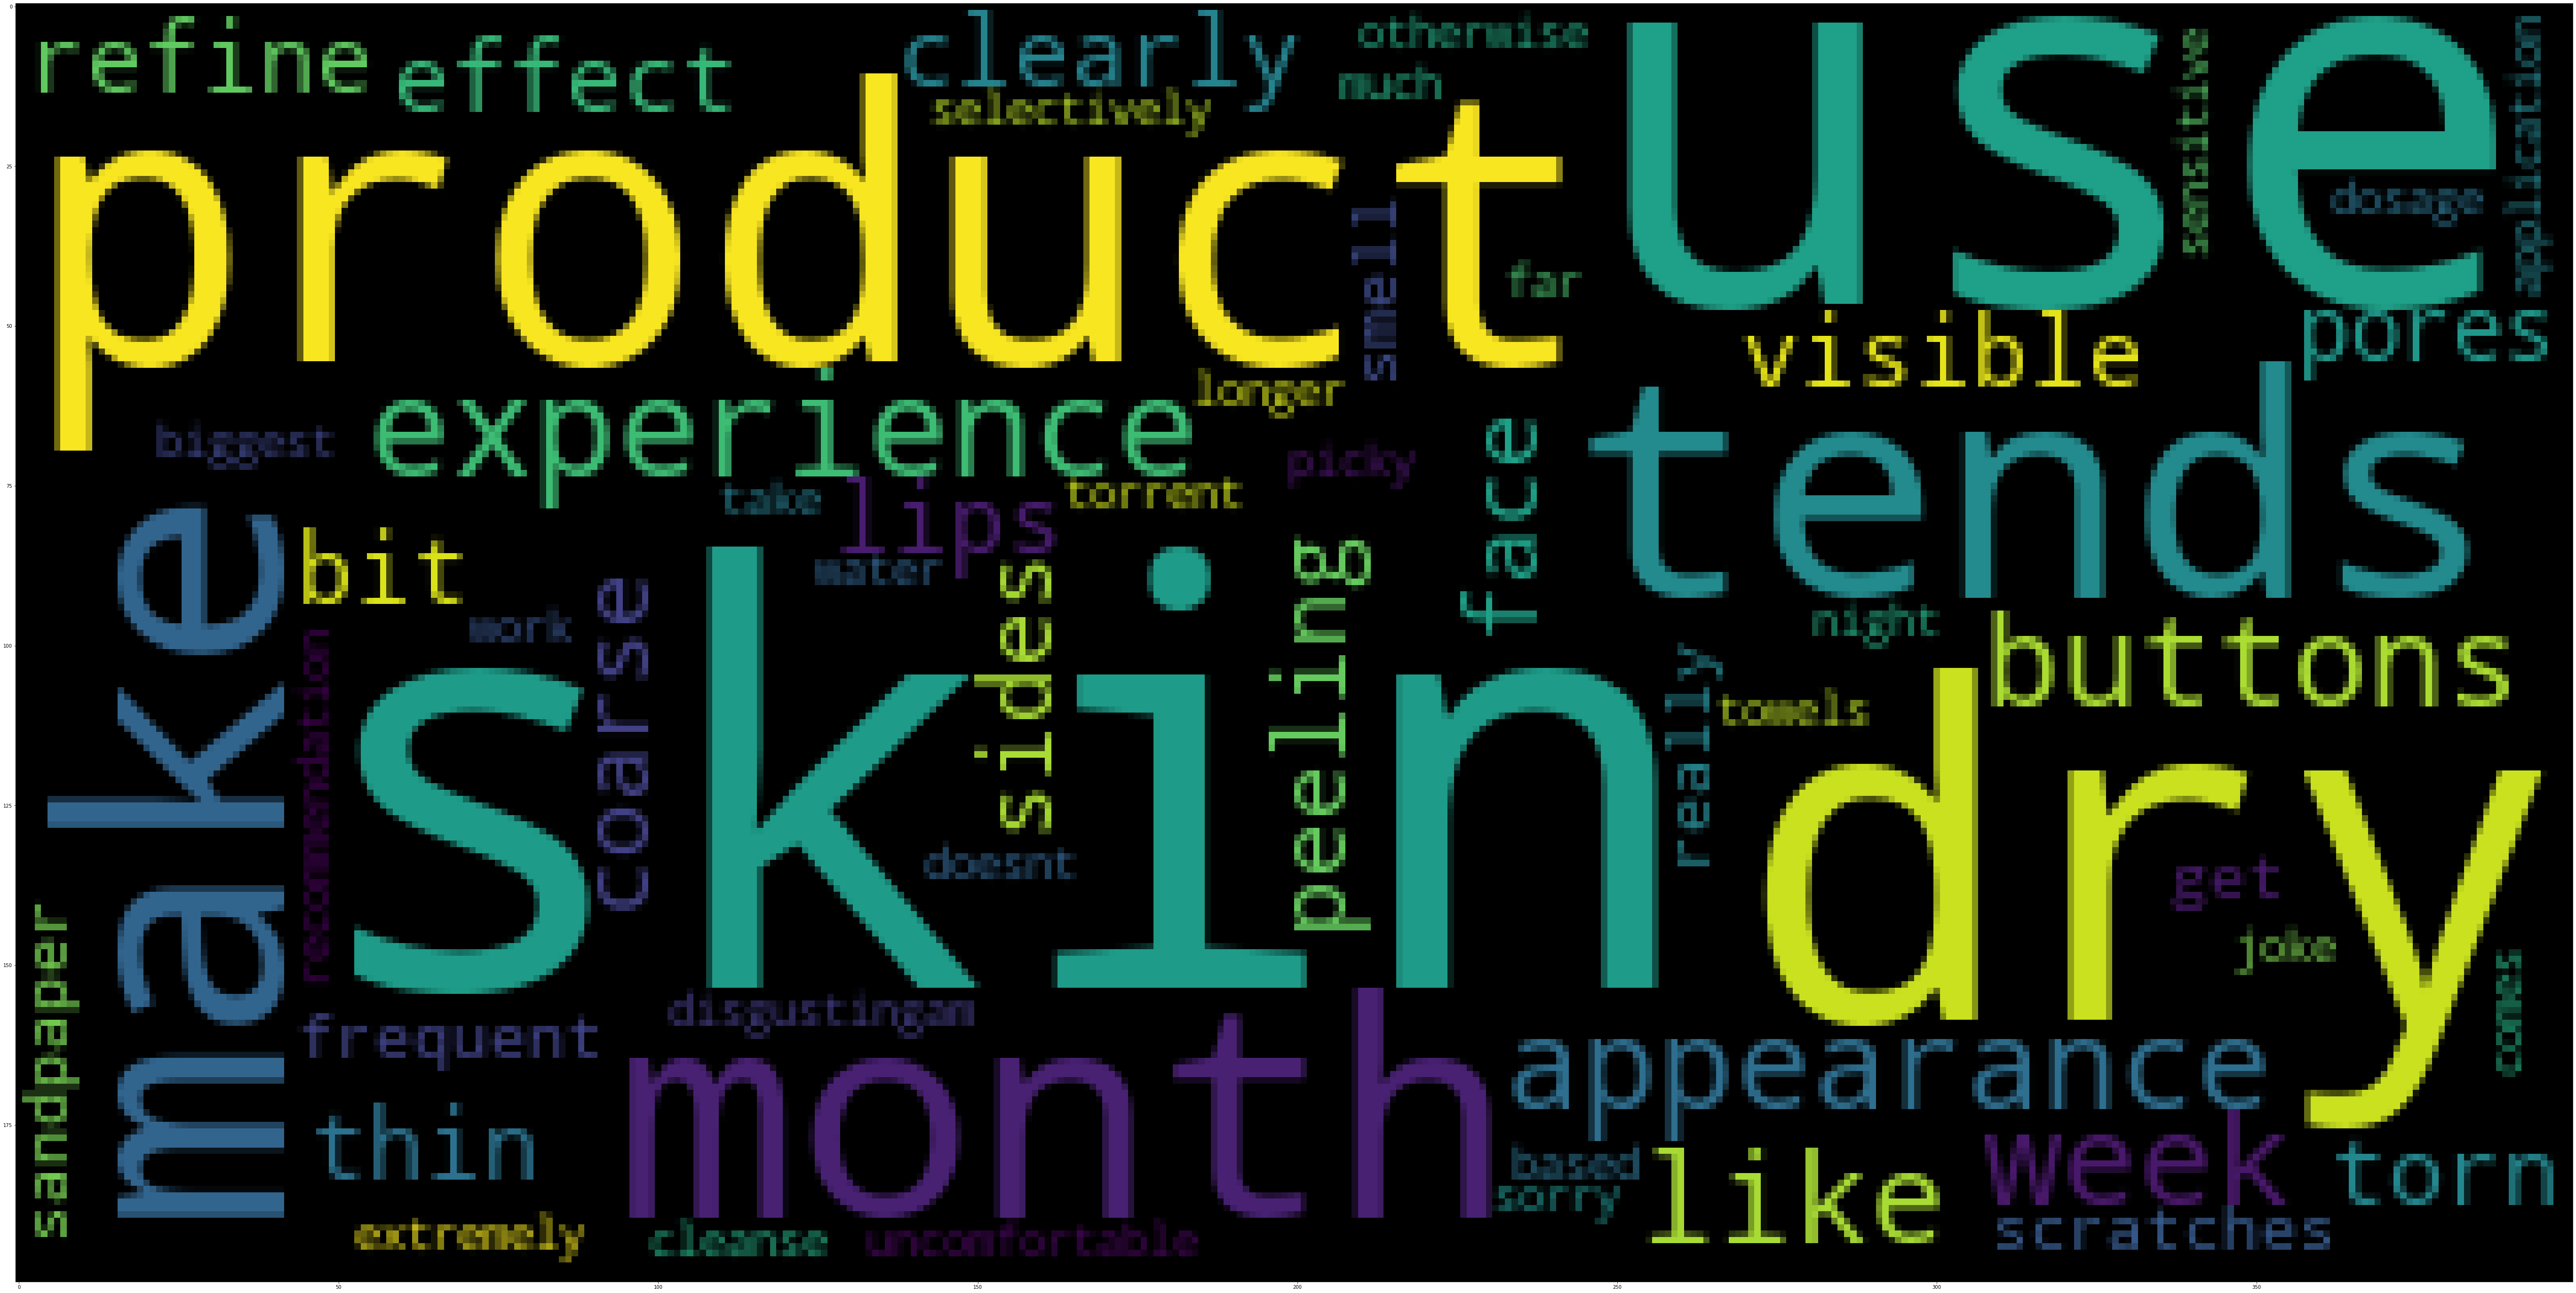

In [82]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(negative_review_cleansers.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [83]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Positive_review_count = count_vect.fit_transform(positive_review_cleansers)
Positive_review_dtm_c=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names())

In [84]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(negative_review_cleansers)
Negative_review_dtm_c=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names())

In [85]:
word_freq_dictionary_cleansers_pos = dict(Positive_review_dtm_c.apply(sum))
word_freq_dictionary_cleansers_neg = dict(Negative_review_dtm_c.apply(sum))

cleansers_pos =pd.DataFrame([word_freq_dictionary_cleansers_pos]).T.reset_index()
cleansers_pos.rename(columns={'index':'Keywords'}, inplace=True)
cleansers_pos.rename(columns={0:'Keyword Frequency'}, inplace=True)

cleansers_neg =pd.DataFrame([word_freq_dictionary_cleansers_neg]).T.reset_index()
cleansers_neg.rename(columns={'index':'Keywords'}, inplace=True)
cleansers_neg.rename(columns={0:'Keyword Frequency'}, inplace=True)

In [86]:
cleansers_positive_word_freq=cleansers_pos.sort_values(by=['Keyword Frequency'],ascending=False).head(10)
cleansers_positive_word_freq

Keywords  Keyword Frequency
638       skin                371
291        gel                169
305       good                125
547    product                110
745        use                 94
23        also                 93
309      great                 89
117  cleansing                 89
573     really                 80
256       face                 79

In [87]:
cleansers_negative_word_freq=cleansers_neg.sort_values(by=['Keyword Frequency'],ascending=False).head(10)

3.  Most Frequently Used Keywords

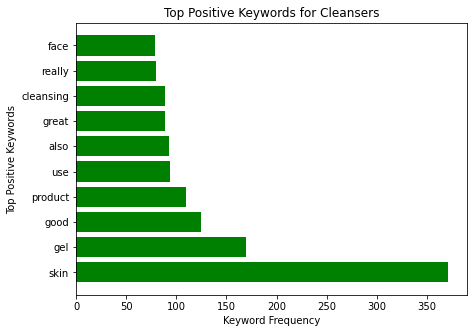

In [88]:
plt.figure(figsize = ( 7 , 5))
plt.barh(cleansers_positive_word_freq['Keywords'],cleansers_positive_word_freq['Keyword Frequency'],color='Green')
plt.title('Top Positive Keywords for Cleansers')
plt.ylabel('Top Positive Keywords')
plt.xlabel('Keyword Frequency')
plt.show()

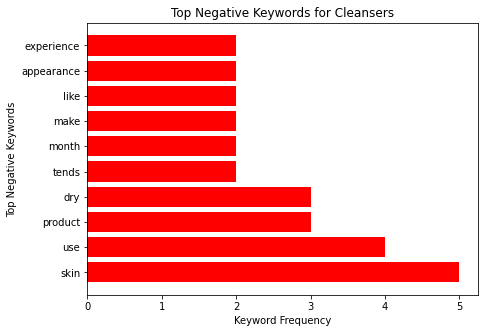

In [89]:
plt.figure(figsize = ( 7 , 5))
plt.barh(cleansers_negative_word_freq['Keywords'],cleansers_negative_word_freq['Keyword Frequency'],color='Red')
plt.title('Top Negative Keywords for Cleansers')
plt.ylabel('Top Negative Keywords')
plt.xlabel('Keyword Frequency')
plt.show()

# Word Clouds and Top Keyowords for Moisturisers

1. Word Clouds for Positive Reviews

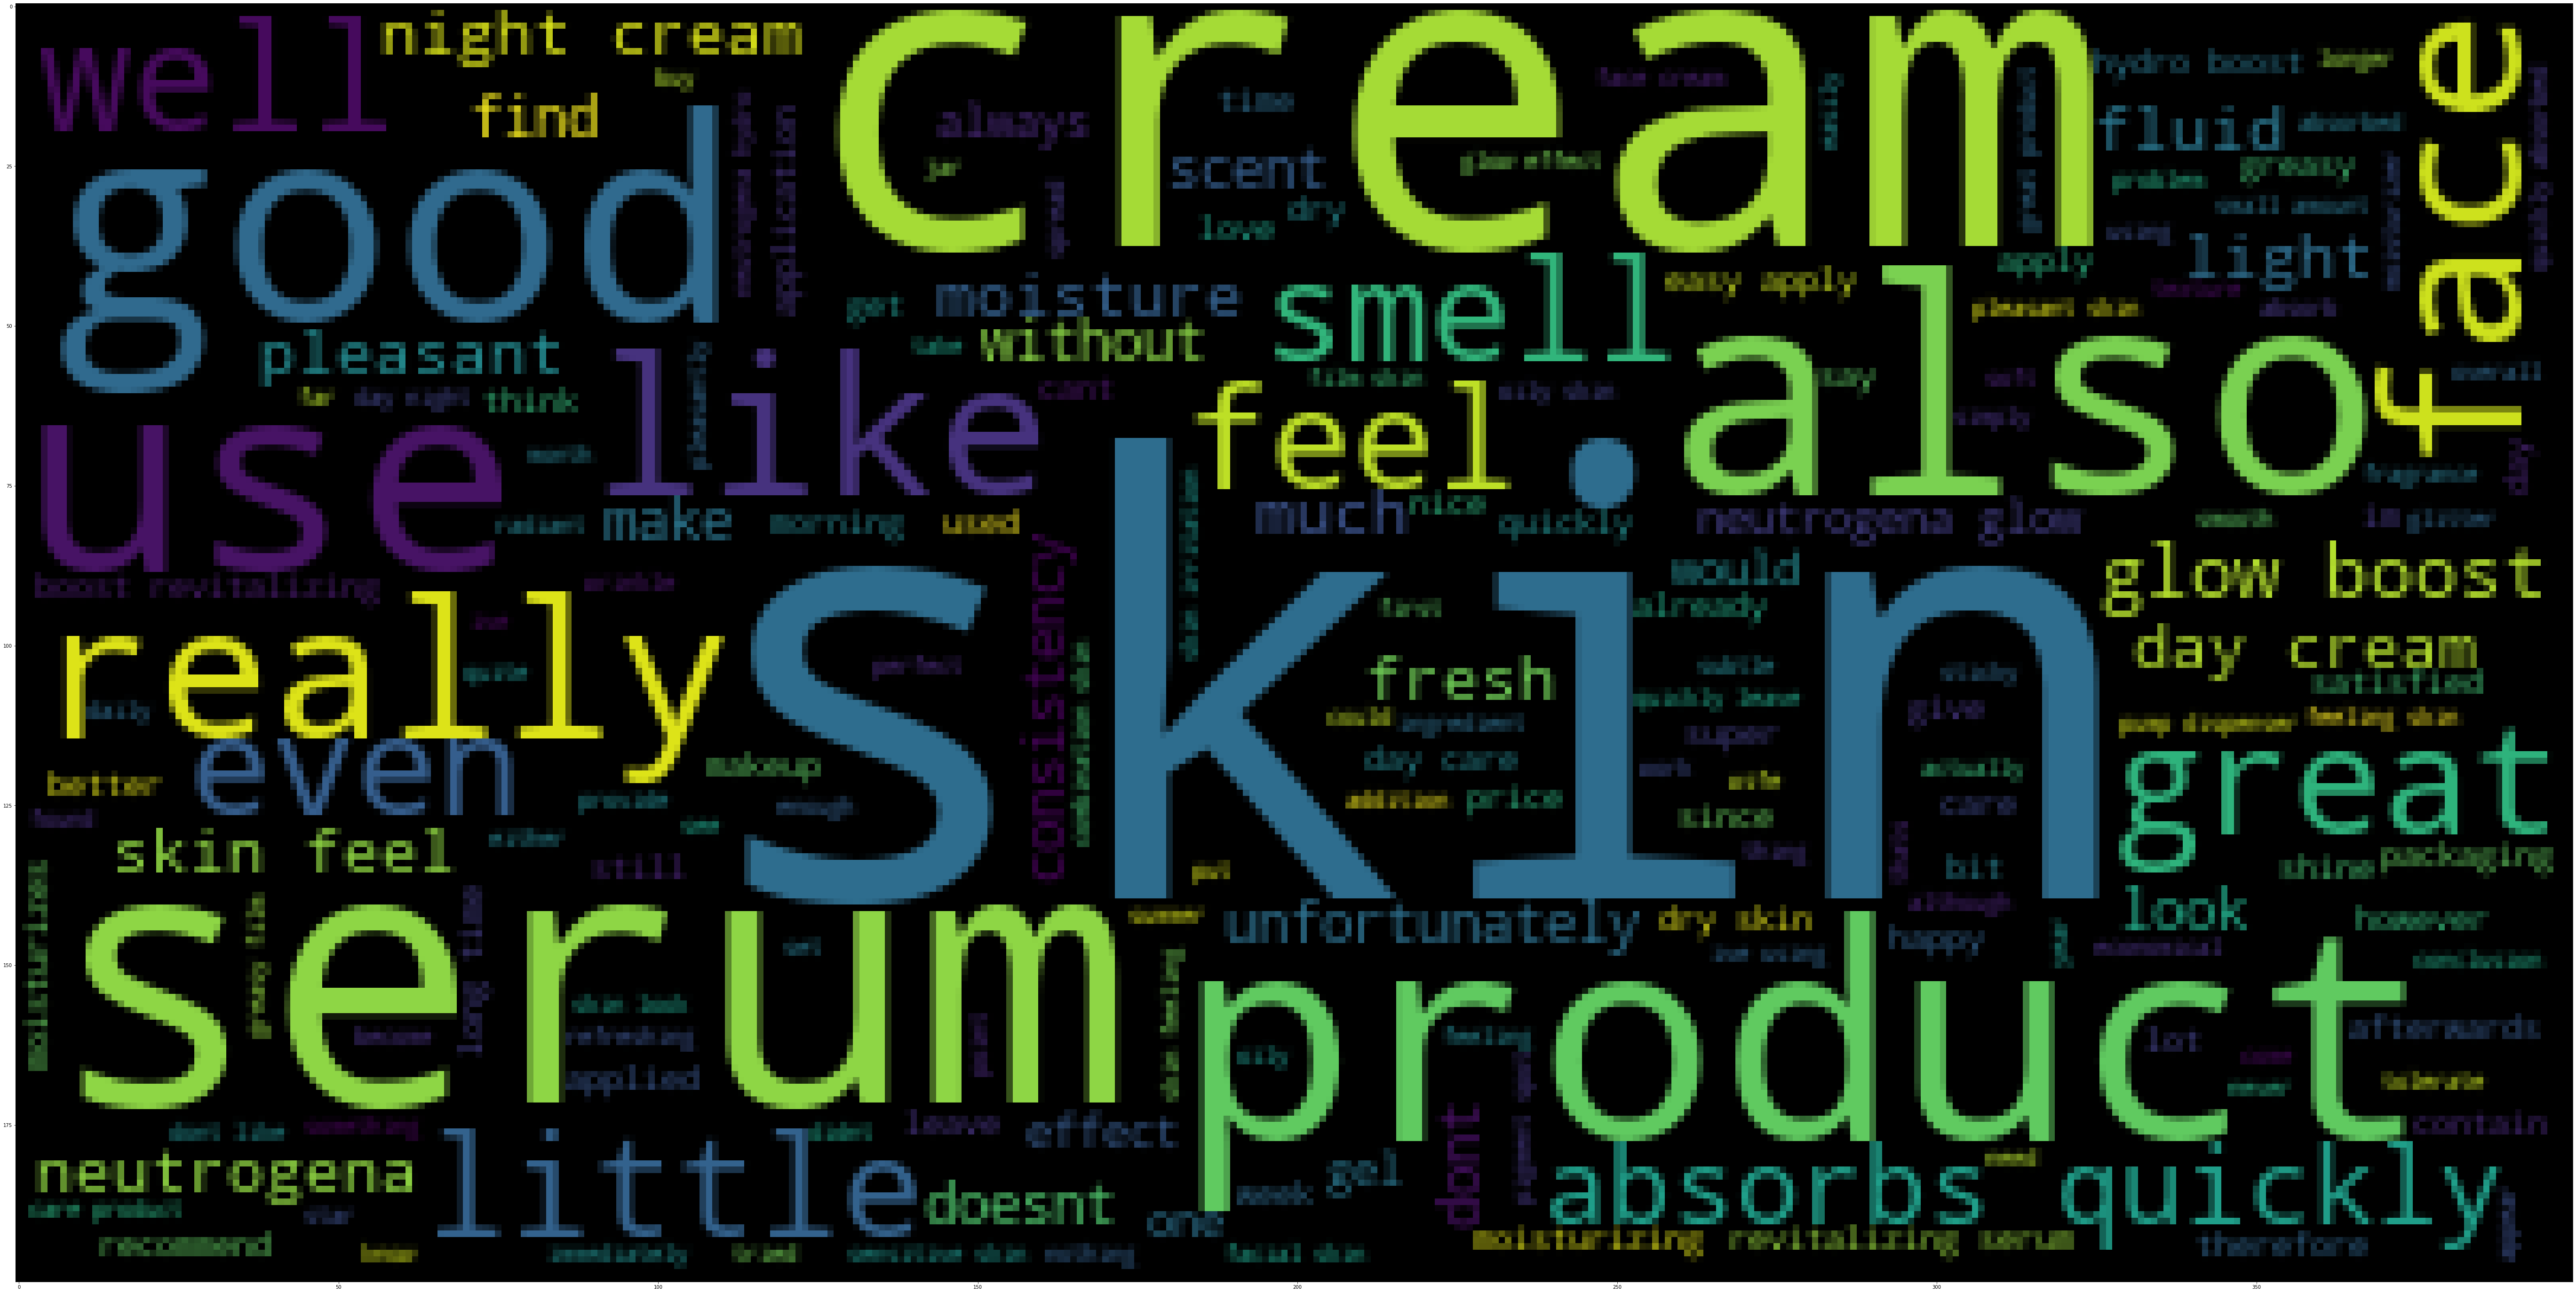

In [90]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(positive_review_moisturisers.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

2. Word Cloud for Negative Reviews

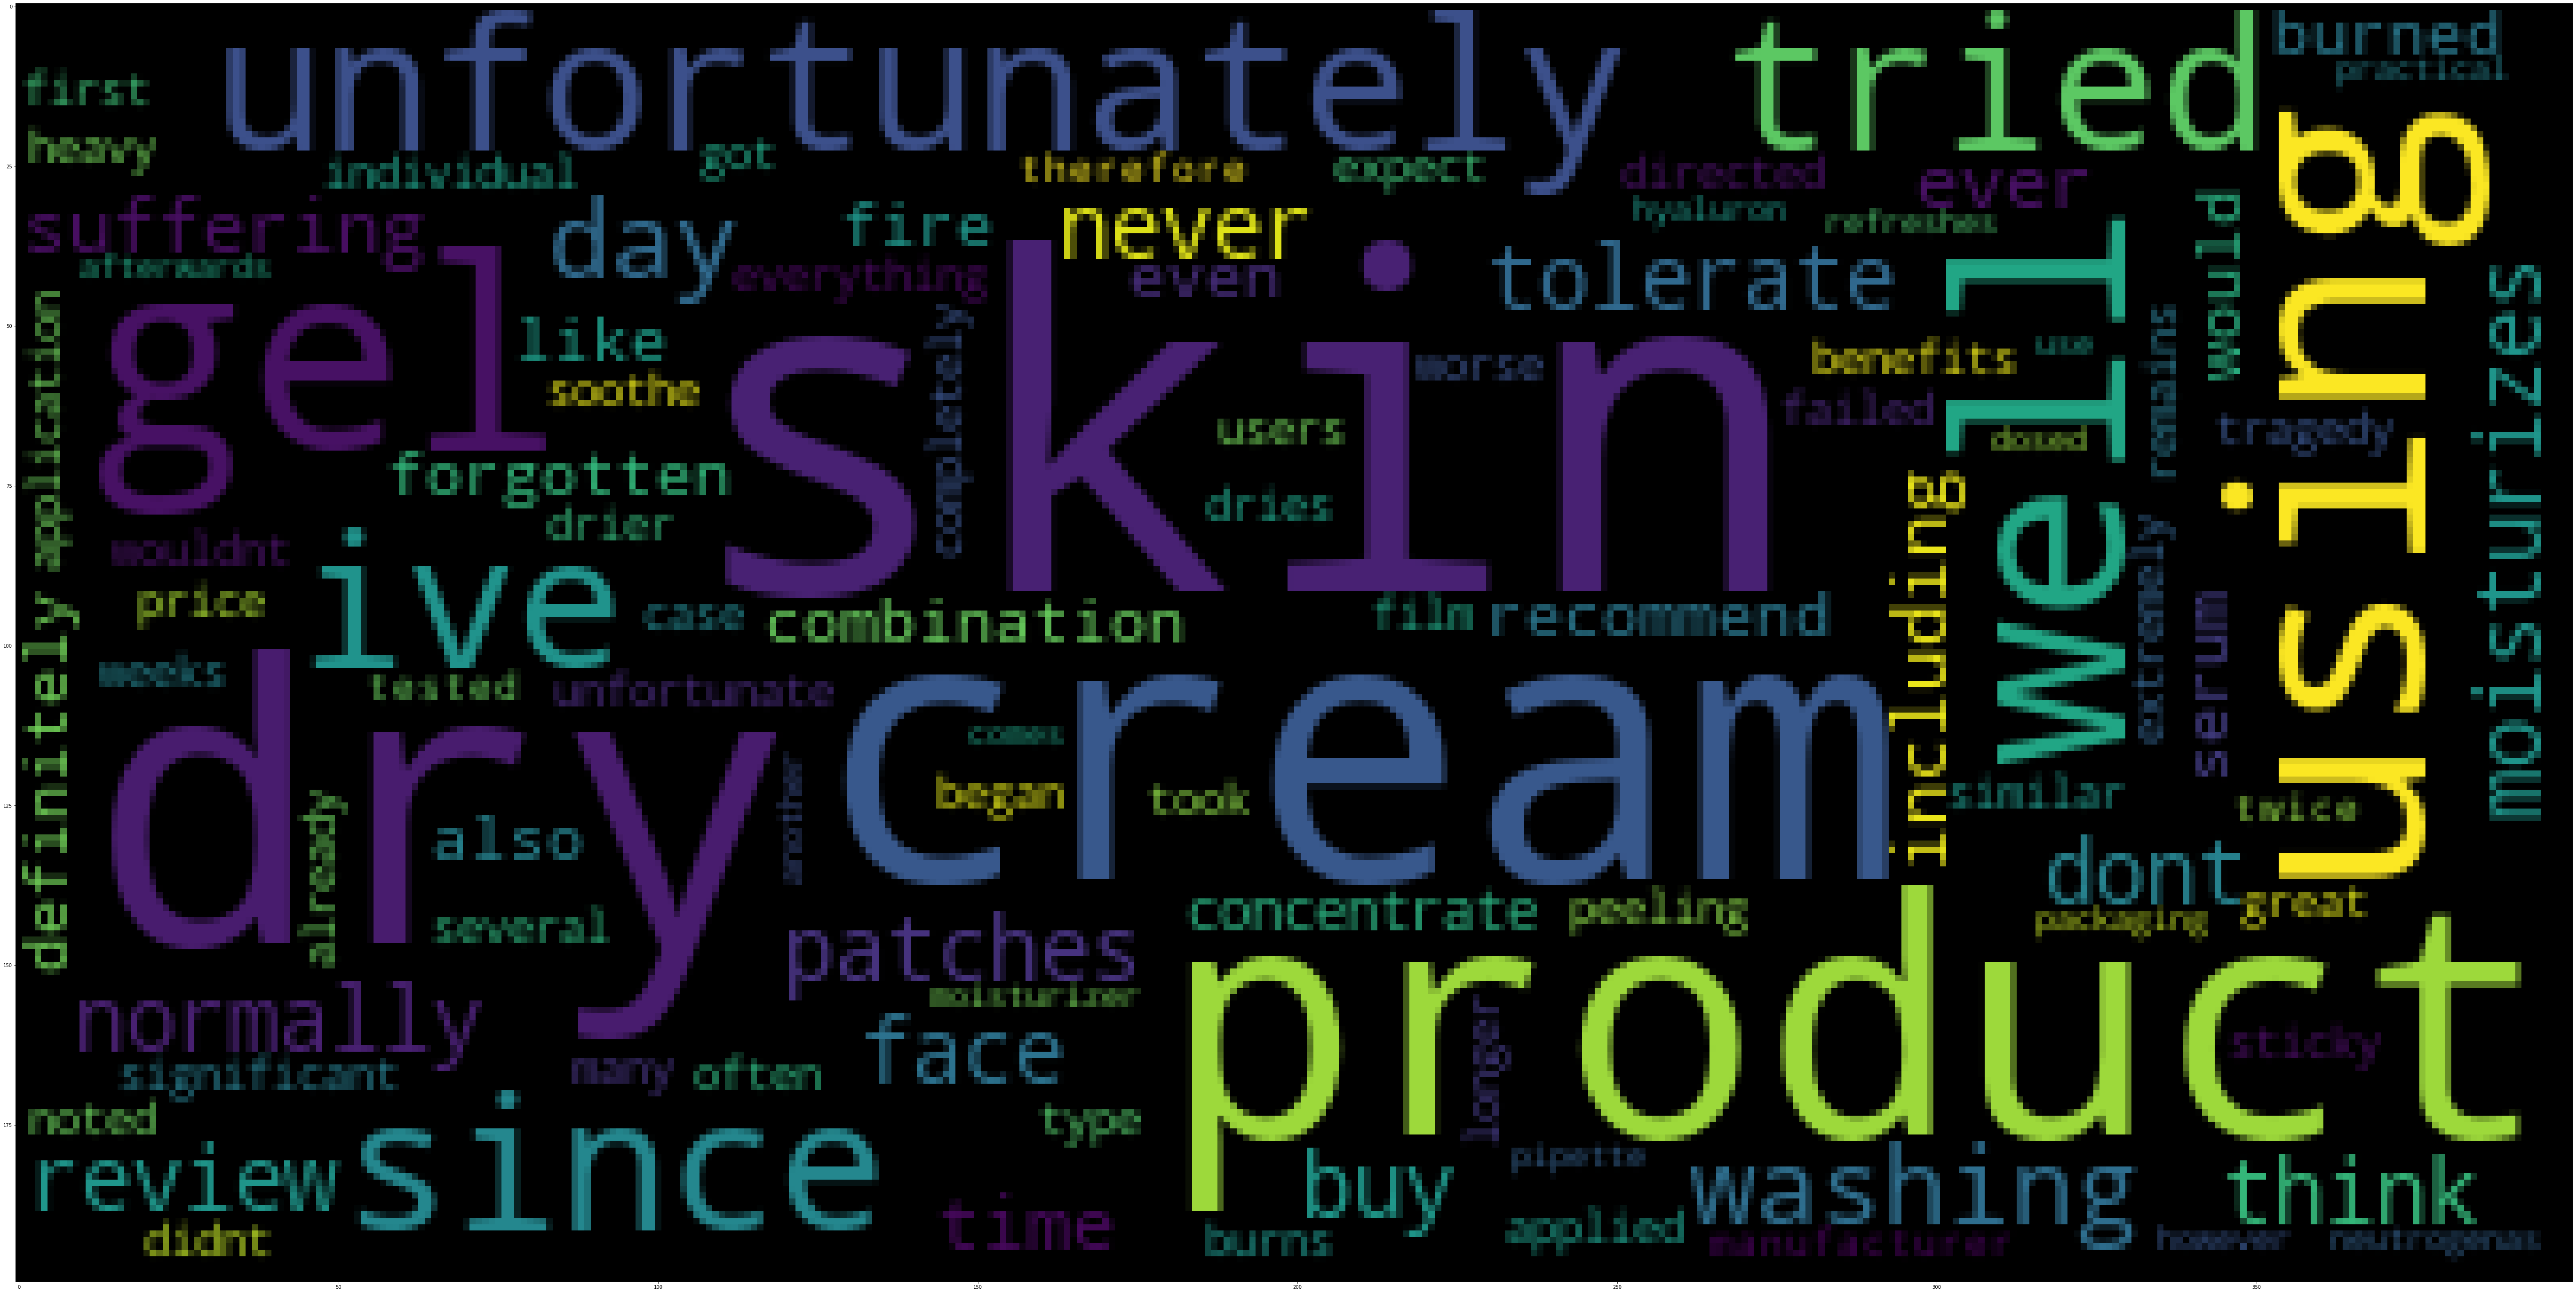

In [91]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(negative_review_moisturisers.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [92]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Positive_review_count = count_vect.fit_transform(positive_review_moisturisers)
Positive_review_dtm_m=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names())

In [93]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(negative_review_moisturisers)
Negative_review_dtm_m=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names())

In [94]:
word_freq_dictionary_moisturisers_pos = dict(Positive_review_dtm_m.apply(sum))
word_freq_dictionary_moisturisers_neg = dict(Negative_review_dtm_m.apply(sum))

moisturisers_pos =pd.DataFrame([word_freq_dictionary_moisturisers_pos]).T.reset_index()
moisturisers_pos.rename(columns={'index':'Keywords'}, inplace=True)
moisturisers_pos.rename(columns={0:'Keyword Frequency'}, inplace=True)

moisturisers_neg =pd.DataFrame([word_freq_dictionary_moisturisers_neg]).T.reset_index()
moisturisers_neg.rename(columns={'index':'Keywords'}, inplace=True)
moisturisers_neg.rename(columns={0:'Keyword Frequency'}, inplace=True)

In [95]:
moisturisers_positive_word_freq=moisturisers_pos.sort_values(by=['Keyword Frequency'],ascending=False).head(10)
moisturisers_negative_word_freq=moisturisers_neg.sort_values(by=['Keyword Frequency'],ascending=False)

3. Most Frequently Used Keywords

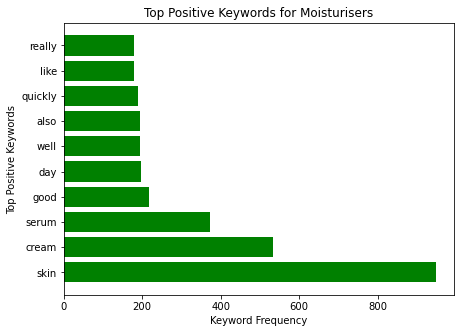

In [96]:
plt.figure(figsize = ( 7 , 5))
plt.barh(moisturisers_positive_word_freq['Keywords'],moisturisers_positive_word_freq['Keyword Frequency'],color='Green')
plt.title('Top Positive Keywords for Moisturisers')
plt.ylabel('Top Positive Keywords')
plt.xlabel('Keyword Frequency')
plt.show()

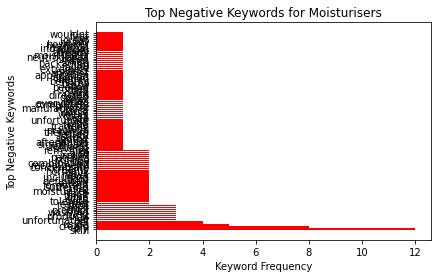

In [97]:
#plt.figure(figsize = ( 7 , 5))
plt.barh(moisturisers_negative_word_freq['Keywords'],moisturisers_negative_word_freq['Keyword Frequency'],color='Red')
plt.title('Top Negative Keywords for Moisturisers')
plt.ylabel('Top Negative Keywords')
plt.xlabel('Keyword Frequency')
plt.show()